In [1]:
# !pip install seaborn
# !pip install matplotlib
# !pip install mlxtend
# !pip install folium
# !pip install scikit-learn-extra
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Import libray
import sqlite3
import pandas as pd
import numpy as np
from IPython.display import Markdown, display
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Creating a connection to the database 
con = sqlite3.connect('accident_data_v1.0.0_2023.db')

In [4]:
#To show all the column names
pd.set_option('display.max_columns', None)

In [5]:
#Creating a cursor query to fetch resulis
#cur= con.cursor()

In [6]:
#To read the data into a pandas dataframe 
query1 = 'SELECT * FROM accident'
query2 = 'SELECT * FROM casualty'
query3 = 'SELECT * FROM vehicle'
query4 = 'SELECT * FROM lsoa'
accident = pd.read_sql(query1, con)
casualty = pd.read_sql(query2, con)
vehicle = pd.read_sql(query3, con)
lsoa = pd.read_sql(query4, con)

In [7]:
#To check the rows of the accident dataset
accident .head()

accident_index  accident_year accident_reference  location_easting_osgr  \
0  2017010001708           2017          010001708               532920.0   
1  2017010009342           2017          010009342               526790.0   
2  2017010009344           2017          010009344               535200.0   
3  2017010009348           2017          010009348               534340.0   
4  2017010009350           2017          010009350               533680.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                196330.0  -0.080107  51.650061             1   
1                181970.0  -0.173845  51.522425             1   
2                181260.0  -0.052969  51.514096             1   
3                193560.0  -0.060658  51.624832             1   
4                187820.0  -0.072372  51.573408             1   

   accident_severity  number_of_vehicles  number_of_casualties        date  \
0                  1                   2                     3  05/08/2017   
1                  3                   2                     1  01/01/2017   
2                  3                   3                     1  01/01/2017   
3                  3                   2                     1  01/01/2017   
4                  2                   1                     1  01/01/2017   

   day_of_week   time  local_authority_district local_authority_ons_district  \
0            7  03:12                        32                    E09000010   
1            1  01:30                         1                    E09000033   
2            1  00:30                         5                    E09000030   
3            1  01:11                        32                    E09000010   
4            1  01:42                         4                    E09000012   

  local_authority_highway  first_road_class  first_road_number  road_type  \
0               E09000010                 3                105          6   
1               E09000033                 3                  5          6   
2               E09000030                 3                 13          6   
3               E09000010                 3               1010          1   
4               E09000012                 3                107          3   

   speed_limit  junction_detail  junction_control  second_road_class  \
0           30                0                -1                 -1   
1           30                3                 4                  6   
2           30                3                 4                  5   
3           30                1                 4                  4   
4           20                6                 2                  3   

   second_road_number  pedestrian_crossing_human_control  \
0                  -1                                  0   
1                   0                                  0   
2                   0                                  0   
3                 154                                  0   
4                  10                                  0   

   pedestrian_crossing_physical_facilities  light_conditions  \
0                                        0                 4   
1                                        0                 4   
2                                        0                 4   
3                                        4                 4   
4                                        5                 4   

   weather_conditions  road_surface_conditions  special_conditions_at_site  \
0                   1                        1                           0   
1                   1                        2                           0   
2                   1                        1                           0   
3                   2                        2                           0   
4                   1                        2                           0   

   carriageway_hazards  urban_or_rural_area  \
0                    0                  

In [8]:
#To check the accident info

accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461352 entries, 0 to 461351
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               461352 non-null  object 
 1   accident_year                                461352 non-null  int64  
 2   accident_reference                           461352 non-null  object 
 3   location_easting_osgr                        461236 non-null  float64
 4   location_northing_osgr                       461236 non-null  float64
 5   longitude                                    461226 non-null  float64
 6   latitude                                     461226 non-null  float64
 7   police_force                                 461352 non-null  int64  
 8   accident_severity                            461352 non-null  int64  
 9   number_of_vehicles                           461352 non-nul

In [9]:
#To check the rows of the casualty dataset
casualty .head()

casualty_index accident_index  accident_year accident_reference  \
0               0  2017010001708           2017          010001708   
1               1  2017010001708           2017          010001708   
2               2  2017010001708           2017          010001708   
3               3  2017010009342           2017          010009342   
4               4  2017010009344           2017          010009344   

   vehicle_reference  casualty_reference  casualty_class  sex_of_casualty  \
0                  1                   1               2                2   
1                  2                   2               1                1   
2                  2                   3               2                1   
3                  1                   1               2                2   
4                  3                   1               1                2   

   age_of_casualty  age_band_of_casualty  casualty_severity  \
0               18                     4                  3   
1               19                     4                  2   
2               18                     4                  1   
3               33                     6                  3   
4               31                     6                  3   

   pedestrian_location  pedestrian_movement  car_passenger  \
0                    0                    0              1   
1                    0                    0              0   
2                    0                    0              0   
3                    0                    0              1   
4                    0                    0              0   

   bus_or_coach_passenger  pedestrian_road_maintenance_worker  casualty_type  \
0                       0                                   0              9   
1                       0                                   0              2   
2                       0                                   0              2   
3                       0                                   0              9   
4                       0                                   0              9   

   casualty_home_area_type  casualty_imd_decile  
0                        1                    2  
1                       -1                   -1  
2                       -1                   -1  
3                        1                    5  
4                        1                    5

In [10]:
#To check the rows of the vehicle dataset
vehicle .head()

vehicle_index accident_index  accident_year accident_reference  \
0              0  2017010001708           2017          010001708   
1              1  2017010001708           2017          010001708   
2              2  2017010009342           2017          010009342   
3              3  2017010009342           2017          010009342   
4              4  2017010009344           2017          010009344   

   vehicle_reference  vehicle_type  towing_and_articulation  \
0                  1             9                        0   
1                  2             2                        0   
2                  1             9                        0   
3                  2             9                        0   
4                  1             9                        0   

   vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  \
0                 18                       1                     5   
1                 18                       1                     5   
2                 18                       5                     1   
3                 18                       5                     1   
4                 18                       3                     7   

   vehicle_location_restricted_lane  junction_location  \
0                                 0                  0   
1                                 0                  0   
2                                 0                  1   
3                                 0                  1   
4                                 0                  1   

   skidding_and_overturning  hit_object_in_carriageway  \
0                         0                          0   
1                         1                          0   
2                         0                          0   
3                         1                          0   
4                         0                          0   

   vehicle_leaving_carriageway  hit_object_off_carriageway  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   

   first_point_of_impact  vehicle_left_hand_drive  journey_purpose_of_driver  \
0                      1                        1                          6   
1                      2                        1                          6   
2                      2                        1                          6   
3                      1                        1                          6   
4                      1                        1                          6   

   sex_of_driver  age_of_driver  age_band_of_driver  engine_capacity_cc  \
0              1             24                   5                1997   
1              1             19                   4                  -1   
2              1             33                   6                1797   
3              1             40                   7                2204   
4              3             -1                  -1                  -1   

   propulsion_code  age_of_vehicle generic_make_model  driver_imd_decile  \
0                2               1                 -1                 -1   
1               -1              -1                 -1                 -1   
2                8               8                 -1                  9   
3                2              12                 -1                  2   
4               -1              -1                 -1                 -1   

   driver_home_area_type  
0                     -1  
1                     -1  
2                      1  
3                      1  
4                     -1

In [11]:
#To check the rows of the lsoa dataset
lsoa.head()

objectid   lsoa01cd             lsoa01nm            lsoa01nmw  \
0         1  E01000001  City of London 001A  City of London 001A   
1         2  E01000002  City of London 001B  City of London 001B   
2         3  E01000003  City of London 001C  City of London 001C   
3         4  E01000004  City of London 001D  City of London 001D   
4         5  E01000005  City of London 001E  City of London 001E   

    shape__area  shape__length                              globalid  
0  1.298652e+05    2635.772001  68cc6127-1008-4fbe-a16c-78fb089a7c43  
1  2.284189e+05    2707.986202  937edbc3-c1bf-4d35-b274-b0a1480a7c09  
2  5.905477e+04    1224.774479  2686dcaf-10b9-4736-92af-4788d4feaa69  
3  2.544551e+06   10718.466240  3c493140-0b3f-4b9a-b358-22011dc5fb89  
4  1.895782e+05    2275.809358  b569093d-788d-41be-816c-d6d7658b2311

#### The age of the oldest driver/rider in the casualty table

In [12]:
#The age of the oldest driver/rider in the casualty table

query = 'SELECT MAX(age_of_casualty) AS oldest_age FROM casualty WHERE casualty_class = 1'
oldest_driver = pd.read_sql(query, con)

In [13]:
oldest_driver

oldest_age
0         101

#### The total number of vehicle_type = 19 vehicles in the vehicle table

In [14]:
#The total number of vehicle_type = 19 vehicles in the vehicle table

query = 'SELECT COUNT(*) AS total_count FROM vehicle WHERE vehicle_type = 19'
total_number = pd.read_sql(query, con)

In [15]:
total_number

total_count
0        47458

#### The sex of driver, sex of casualty, speed limit and age of vehicle

In [16]:
#The sex of driver, sex of casualty, speed limit and age of vehicle
query = '''
SELECT v.sex_of_driver, c.sex_of_casualty, a.speed_limit, v.age_of_vehicle, ls.lsoa01nm
FROM accident a, vehicle v, casualty c, lsoa ls
WHERE a.accident_index = v.accident_index AND
a.accident_index = c.accident_index AND
a.lsoa_of_accident_location = ls.lsoa01cd AND
ls.lsoa01nm LIKE '%Kingston Upon Hull%';
'''

results = pd.read_sql(query, con)

In [17]:
results

sex_of_driver  sex_of_casualty  speed_limit  age_of_vehicle  \
0                 1                1           30              13   
1                 1                1           30               9   
2                 3                1           30               6   
3                 3                2           30               6   
4                 1                1           30              11   
...             ...              ...          ...             ...   
6382              1                1           30              -1   
6383              1                1           30              -1   
6384              1                1           30              -1   
6385              3                1           30              -1   
6386              1                1           30              -1   

                     lsoa01nm  
0     Kingston upon Hull 028C  
1     Kingston upon Hull 028C  
2     Kingston upon Hull 029A  
3     Kingston upon Hull 029A  
4     Kingston upon Hull 029A  
...                       ...  
6382  Kingston upon Hull 006E  
6383  Kingston upon Hull 006E  
6384  Kingston upon Hull 007C  
6385  Kingston upon Hull 029C  
6386  Kingston upon Hull 029C  

[6387 rows x 5 columns]

# Using the data from 2020

In [18]:
#To filter the accident, vechile, casuality data for the year 2020

accident = accident[accident['accident_year'] == 2020]
vehicle = vehicle[vehicle['accident_year'] == 2020] 
casualty = casualty[casualty['accident_year'] == 2020]

In [19]:
accident.head()

accident_index  accident_year accident_reference  \
370153  2020010219808           2020          010219808   
370154  2020010220496           2020          010220496   
370155  2020010228005           2020          010228005   
370156  2020010228006           2020          010228006   
370157  2020010228011           2020          010228011   

        location_easting_osgr  location_northing_osgr  longitude   latitude  \
370153               521389.0                175144.0  -0.254001  51.462262   
370154               529337.0                176237.0  -0.139253  51.470327   
370155               526432.0                182761.0  -0.178719  51.529614   
370156               538676.0                184371.0  -0.001683  51.541210   
370157               529324.0                181286.0  -0.137592  51.515704   

        police_force  accident_severity  number_of_vehicles  \
370153             1                  3                   1   
370154             1                  3                   1   
370155             1                  3                   1   
370156             1                  2                   1   
370157             1                  3                   1   

        number_of_casualties        date  day_of_week   time  \
370153                     1  04/02/2020            3  09:00   
370154                     2  27/04/2020            2  13:55   
370155                     1  01/01/2020            4  01:25   
370156                     1  01/01/2020            4  01:50   
370157                     2  01/01/2020            4  02:25   

        local_authority_district local_authority_ons_district  \
370153                        10                    E09000032   
370154                         9                    E09000022   
370155                         1                    E09000033   
370156                        17                    E09000025   
370157                         1                    E09000033   

       local_authority_highway  first_road_class  first_road_number  \
370153               E09000032                 6                  0   
370154               E09000022                 3               3036   
370155               E09000033                 5                  0   
370156               E09000025                 3                 11   
370157               E09000033                 3                 40   

        road_type  speed_limit  junction_detail  junction_control  \
370153          6           20                0                -1   
370154          6           20                9                 2   
370155          6           30                3                 1   
370156          6           30                0                -1   
370157          6           30                3                 4   

        second_road_class  second_road_number  \
370153                  0                  -1   
370154                  6                   0   
370155                  6                   0   
370156                  0                  -1   
370157                  5                   0   

        pedestrian_crossing_human_control  \
370153                                  9   
370154                                  0   
370155                                  0   
370156                                  0   
370157                                  0   

        pedestrian_crossing_physical_facilities  light_conditions  \
370153                                        9                 1   
370154                                        4                 1   
370155                                        0                 4   
370156                                        4                 4   
370157                                        0                 4   

        weather_conditions  road_surface_conditions  \
370153                   9                        9   
370154                   1                        1   
370155                   1        

In [20]:
vehicle.head()

vehicle_index accident_index  accident_year accident_reference  \
681716         681716  2020010219808           2020          010219808   
681717         681717  2020010220496           2020          010220496   
681718         681718  2020010228005           2020          010228005   
681719         681719  2020010228006           2020          010228006   
681720         681720  2020010228011           2020          010228011   

        vehicle_reference  vehicle_type  towing_and_articulation  \
681716                  1             9                        9   
681717                  1             9                        0   
681718                  1             9                        0   
681719                  1             8                        0   
681720                  1             9                        0   

        vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  \
681716                  5                       1                     5   
681717                  4                       2                     6   
681718                 18                      -1                    -1   
681719                 18                       1                     5   
681720                 18                       3                     7   

        vehicle_location_restricted_lane  junction_location  \
681716                                 0                  0   
681717                                 0                  2   
681718                                 0                  0   
681719                                 0                  0   
681720                                 9                  1   

        skidding_and_overturning  hit_object_in_carriageway  \
681716                         0                          0   
681717                         0                          0   
681718                         0                          0   
681719                         0                          0   
681720                         0                          0   

        vehicle_leaving_carriageway  hit_object_off_carriageway  \
681716                            0                           0   
681717                            0                           0   
681718                            0                           0   
681719                            0                           0   
681720                            0                           0   

        first_point_of_impact  vehicle_left_hand_drive  \
681716                      4                        9   
681717                      1                        1   
681718                      1                        1   
681719                      1                        1   
681720                      1                        1   

        journey_purpose_of_driver  sex_of_driver  age_of_driver  \
681716                          6              2             32   
681717                          2              1             45   
681718                          6              3             -1   
681719                          1              1             44   
681720                          6              1             20   

        age_band_of_driver  engine_capacity_cc  propulsion_code  \
681716                   6                1968                2   
681717                   7                1395                1   
681718                  -1                  -1               -1   
681719                   7                1798                8   
681720                   4                2993                2   

        age_of_vehicle generic_make_model  driver_imd_decile  \
681716               6            AUDI Q5                  4   
681717               2            AUDI A1                  7   
681718              -1                 -1                 -1   
681719               8       TOYOTA PRIUS                  2   
681720               4       BMW 4 SERIES                 -1   

  

In [21]:
casualty.head()

casualty_index accident_index  accident_year accident_reference  \
484748          484748  2020010219808           2020          010219808   
484749          484749  2020010220496           2020          010220496   
484750          484750  2020010220496           2020          010220496   
484751          484751  2020010228005           2020          010228005   
484752          484752  2020010228006           2020          010228006   

        vehicle_reference  casualty_reference  casualty_class  \
484748                  1                   1               3   
484749                  1                   1               3   
484750                  1                   2               3   
484751                  1                   1               3   
484752                  1                   1               3   

        sex_of_casualty  age_of_casualty  age_band_of_casualty  \
484748                1               31                     6   
484749                2                2                     1   
484750                2                4                     1   
484751                1               23                     5   
484752                1               47                     8   

        casualty_severity  pedestrian_location  pedestrian_movement  \
484748                  3                    9                    5   
484749                  3                    1                    1   
484750                  3                    1                    1   
484751                  3                    5                    9   
484752                  2                    4                    1   

        car_passenger  bus_or_coach_passenger  \
484748              0                       0   
484749              0                       0   
484750              0                       0   
484751              0                       0   
484752              0                       0   

        pedestrian_road_maintenance_worker  casualty_type  \
484748                                   0              0   
484749                                   0              0   
484750                                   0              0   
484751                                   0              0   
484752                                   0              0   

        casualty_home_area_type  casualty_imd_decile  
484748                        1                    4  
484749                        1                    2  
484750                        1                    2  
484751                        1                    3  
484752                        1                    3

# Question 1

## The significant hours of the day, and days of the week, on which accidents occur

### For hours of the day

In [22]:
#to get the time and count of accident in ascending order

accident.groupby('time')["accident_index"].count().sort_values(ascending = False)

time
17:00    862
16:00    785
15:00    774
17:30    746
18:00    739
        ... 
04:39      1
04:58      1
04:31      1
03:36      1
04:33      1
Name: accident_index, Length: 1438, dtype: int64

<AxesSubplot:xlabel='time'>

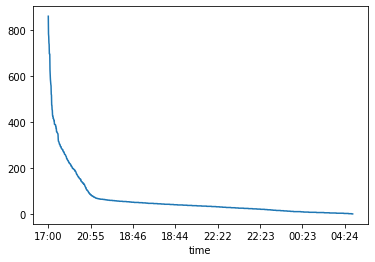

In [23]:
#A plot to show the count of accident and the time

accident.groupby('time')["accident_index"].count().sort_values(ascending = False).plot()

In [24]:
#To get the count of the accident per time

df1 = accident.groupby('time')["accident_index"].count().reset_index()

df1.rename(columns = {"accident_index": "number_of_accident"}, inplace = True)

In [25]:
df1.head()

time  number_of_accident
0  00:00                  36
1  00:01                  91
2  00:02                  16
3  00:03                  15
4  00:04                  23

In [26]:
#to have more insight from the plot the top 20 accident will be choosed

top_20 = df1.sort_values(by = "number_of_accident", ascending=False)[:20]

In [27]:
top_20

time  number_of_accident
1018  17:00                 862
958   16:00                 785
898   15:00                 774
1048  17:30                 746
1078  18:00                 739
838   14:00                 699
988   16:30                 697
928   15:30                 697
1108  18:30                 629
778   13:00                 605
1138  19:00                 587
718   12:00                 575
808   13:30                 565
868   14:30                 559
508   08:30                 522
748   12:30                 519
658   11:00                 475
538   09:00                 474
478   08:00                 455
688   11:30                 453

In [28]:
#To create a function for the bar plot
def plot_bar_chart(data, x_column, y_column, title):
    sns.set(style='whitegrid')
    plt.figure(figsize=(12, 6))
    sns.barplot(x=x_column, y=y_column, data=data, color='blue')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

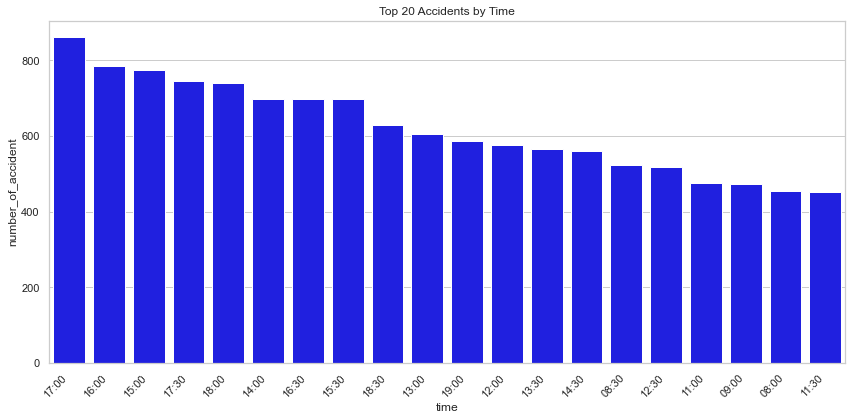

In [29]:
plot_bar_chart(top_20, 'time', 'number_of_accident', 'Top 20 Accidents by Time')

### For days of the week

In [30]:
#To covert the date to specify the day, week and month

accident['date'] = pd.to_datetime(accident['date'], dayfirst=True, format="%d/%m/%Y")

In [31]:
#to get the actual day of the week

accident['day_of_week'] = accident['date'].dt.day_name()

accident['day_of_week']

370153      Tuesday
370154       Monday
370155    Wednesday
370156    Wednesday
370157    Wednesday
            ...    
461347    Wednesday
461348       Friday
461349    Wednesday
461350      Tuesday
461351      Tuesday
Name: day_of_week, Length: 91199, dtype: object

In [32]:
#To get the count of the accident per day of the week

df2 = accident.groupby('day_of_week')["accident_index"].count().reset_index()

df2.rename(columns = {"accident_index": "number_of_accident"}, inplace = True)

In [33]:
#To sort the number of accident in the days of the week by ascending order

df2_sorted = df2.sort_values(by="number_of_accident", ascending=False)

df2_sorted

day_of_week  number_of_accident
0      Friday               14889
4    Thursday               14056
6   Wednesday               13564
5     Tuesday               13267
1      Monday               12772
2    Saturday               12336
3      Sunday               10315

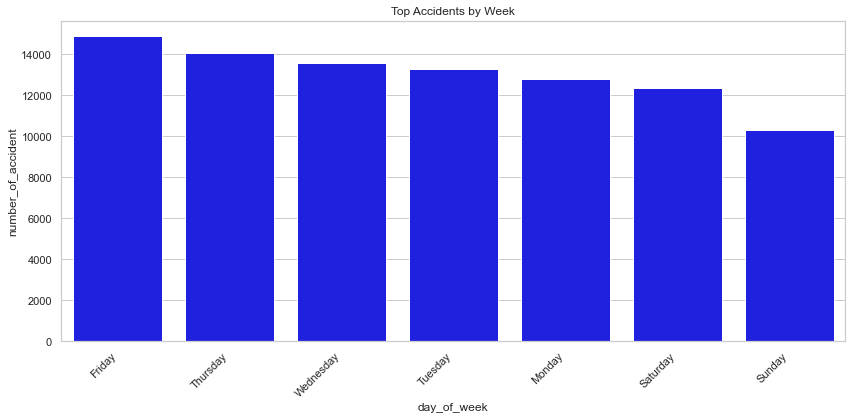

In [34]:
plot_bar_chart(df2_sorted, 'day_of_week', 'number_of_accident', 'Top Accidents by Week')

# Question 2

In [35]:
vehicle.head()

vehicle_index accident_index  accident_year accident_reference  \
681716         681716  2020010219808           2020          010219808   
681717         681717  2020010220496           2020          010220496   
681718         681718  2020010228005           2020          010228005   
681719         681719  2020010228006           2020          010228006   
681720         681720  2020010228011           2020          010228011   

        vehicle_reference  vehicle_type  towing_and_articulation  \
681716                  1             9                        9   
681717                  1             9                        0   
681718                  1             9                        0   
681719                  1             8                        0   
681720                  1             9                        0   

        vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  \
681716                  5                       1                     5   
681717                  4                       2                     6   
681718                 18                      -1                    -1   
681719                 18                       1                     5   
681720                 18                       3                     7   

        vehicle_location_restricted_lane  junction_location  \
681716                                 0                  0   
681717                                 0                  2   
681718                                 0                  0   
681719                                 0                  0   
681720                                 9                  1   

        skidding_and_overturning  hit_object_in_carriageway  \
681716                         0                          0   
681717                         0                          0   
681718                         0                          0   
681719                         0                          0   
681720                         0                          0   

        vehicle_leaving_carriageway  hit_object_off_carriageway  \
681716                            0                           0   
681717                            0                           0   
681718                            0                           0   
681719                            0                           0   
681720                            0                           0   

        first_point_of_impact  vehicle_left_hand_drive  \
681716                      4                        9   
681717                      1                        1   
681718                      1                        1   
681719                      1                        1   
681720                      1                        1   

        journey_purpose_of_driver  sex_of_driver  age_of_driver  \
681716                          6              2             32   
681717                          2              1             45   
681718                          6              3             -1   
681719                          1              1             44   
681720                          6              1             20   

        age_band_of_driver  engine_capacity_cc  propulsion_code  \
681716                   6                1968                2   
681717                   7                1395                1   
681718                  -1                  -1               -1   
681719                   7                1798                8   
681720                   4                2993                2   

        age_of_vehicle generic_make_model  driver_imd_decile  \
681716               6            AUDI Q5                  4   
681717               2            AUDI A1                  7   
681718              -1                 -1                 -1   
681719               8       TOYOTA PRIUS                  2   
681720               4       BMW 4 SERIES                 -1   

  

In [36]:
vehicle.vehicle_type.unique()

array([ 9,  8,  3,  2, 11,  1, 90, 19,  4,  5, 21, 97, 20, 98, 10, 17, 23,
       22, 18, 16], dtype=int64)

In [37]:
#To filter the 'vehicle' DataFrame based on 'vehicle_type' column

vehicle_cat = [2, 3, 4, 5]

vehicle_sub = vehicle[vehicle['vehicle_type'].isin(vehicle_cat)]

In [38]:
vehicle_sub.vehicle_type.unique()

array([3, 2, 4, 5], dtype=int64)

In [39]:
#To join the accident table and vehicle

df_join = pd.merge(accident, vehicle_sub, on = 'accident_index')

In [40]:
df_join.head()

accident_index  accident_year_x accident_reference_x  location_easting_osgr  \
0  2020010228020             2020            010228020               529718.0   
1  2020010228077             2020            010228077               531477.0   
2  2020010228086             2020            010228086               531043.0   
3  2020010228097             2020            010228097               528428.0   
4  2020010228148             2020            010228148               518467.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                192342.0  -0.127840  51.614971             1   
1                174550.0  -0.109087  51.454673             1   
2                176304.0  -0.114680  51.470537             1   
3                179923.0  -0.150994  51.503659             1   
4                185248.0  -0.292651  51.553691             1   

   accident_severity  number_of_vehicles  number_of_casualties       date  \
0                  3                   2                     1 2020-01-01   
1                  2                   2                     1 2020-01-01   
2                  3                   1                     1 2020-01-01   
3                  3                   2                     1 2020-01-01   
4                  3                   1                     1 2020-01-01   

  day_of_week   time  local_authority_district local_authority_ons_district  \
0   Wednesday  03:25                        32                    E09000010   
1   Wednesday  08:00                         9                    E09000022   
2   Wednesday  14:00                         9                    E09000022   
3   Wednesday  14:37                         1                    E09000033   
4   Wednesday  19:05                        28                    E09000005   

  local_authority_highway  first_road_class  first_road_number  road_type  \
0               E09000010                 3                406          3   
1               E09000022                 3               2214          6   
2               E09000022                 6                  0          6   
3               E09000033                 3               4202          3   
4               E09000005                 3                404          6   

   speed_limit  junction_detail  junction_control  second_road_class  \
0           30                6                 2                  3   
1           30                3                 4                  6   
2           20                0                -1                  0   
3           30                0                -1                  0   
4           30                3                 2                  3   

   second_road_number  pedestrian_crossing_human_control  \
0                 406                                  0   
1                   0                                  0   
2                  -1                                  0   
3                  -1                                  0   
4                4089                                  2   

   pedestrian_crossing_physical_facilities  light_conditions  \
0                                        5                 4   
1                                        0                 1   
2                                        0                 1   
3                                        0                 1   
4                                        4                 4   

   weather_conditions  road_surface_conditions  special_conditions_at_site  \
0                   1                        1                           0   
1                   1                        1                           0   
2                   1                        1                           0   
3                   1                        1                           0   
4                   1                        1                           0   

   carriageway_hazards  urban_or_rural_area  \
0                    0      

### For motorbikes significance hour of the day

<AxesSubplot:xlabel='time'>

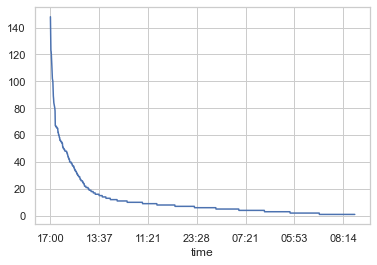

In [41]:
#A plot to show the count of accident and the time

df_join.groupby("time")["accident_index"].count().sort_values(ascending = False).plot()

In [42]:
#To get the count of the accident per time

df3 = df_join.groupby('time')["accident_index"].count().reset_index()

df3.rename(columns = {"accident_index": "number_of_accident"}, inplace = True)

In [43]:
df3.head()

time  number_of_accident
0  00:00                   6
1  00:01                   6
2  00:02                   2
3  00:03                   3
4  00:04                   4

In [44]:
#to have more insight from the plot the top 20 accident of motorbikes will be choosed

top_20_bikes = df3.sort_values(by = "number_of_accident", ascending=False)[:20]

In [45]:
top_20_bikes

time  number_of_accident
835   17:00                 148
865   17:30                 137
745   15:30                 123
775   16:00                 122
715   15:00                 119
805   16:30                 114
955   19:00                 111
925   18:30                 107
895   18:00                 102
625   13:30                 101
655   14:00                 100
985   19:30                  93
535   12:00                  89
685   14:30                  87
1075  21:00                  84
1015  20:00                  83
595   13:00                  82
820   16:45                  81
1045  20:30                  80
565   12:30                  78

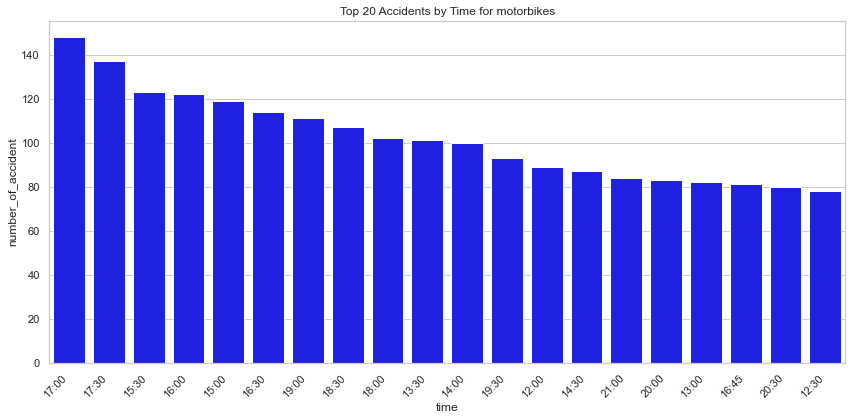

In [46]:
plot_bar_chart(top_20_bikes, 'time', 'number_of_accident', 'Top 20 Accidents by Time for motorbikes')

### For motorbikes significance days of the week

In [47]:
#To get the count of the accident per day of the week for motorbikes

df4 = df_join.groupby('day_of_week')["accident_index"].count().reset_index()

df4.rename(columns = {"accident_index": "number_of_accident"}, inplace = True)

In [48]:
#To sort the number of accident in the days of the week by ascending order

df4_sorted = df4.sort_values(by="number_of_accident", ascending=False)

df4_sorted

day_of_week  number_of_accident
0      Friday                2308
4    Thursday                2172
2    Saturday                2003
6   Wednesday                2001
5     Tuesday                1933
1      Monday                1868
3      Sunday                1841

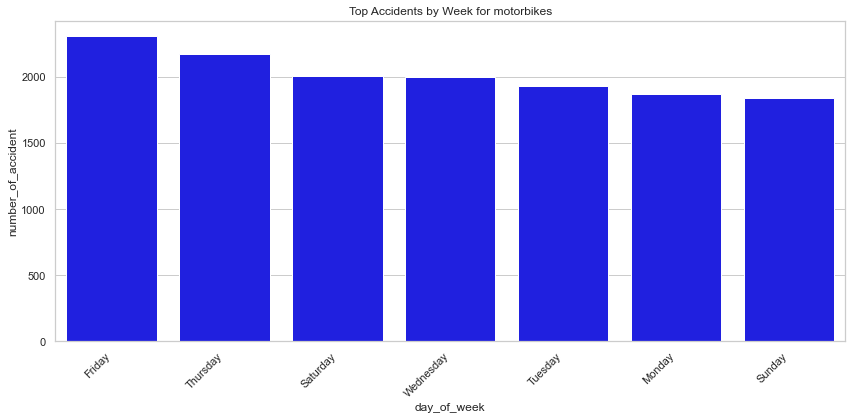

In [49]:
plot_bar_chart(df4_sorted, 'day_of_week', 'number_of_accident', 'Top Accidents by Week for motorbikes')

# Question 3

In [50]:
casualty.head()

casualty_index accident_index  accident_year accident_reference  \
484748          484748  2020010219808           2020          010219808   
484749          484749  2020010220496           2020          010220496   
484750          484750  2020010220496           2020          010220496   
484751          484751  2020010228005           2020          010228005   
484752          484752  2020010228006           2020          010228006   

        vehicle_reference  casualty_reference  casualty_class  \
484748                  1                   1               3   
484749                  1                   1               3   
484750                  1                   2               3   
484751                  1                   1               3   
484752                  1                   1               3   

        sex_of_casualty  age_of_casualty  age_band_of_casualty  \
484748                1               31                     6   
484749                2                2                     1   
484750                2                4                     1   
484751                1               23                     5   
484752                1               47                     8   

        casualty_severity  pedestrian_location  pedestrian_movement  \
484748                  3                    9                    5   
484749                  3                    1                    1   
484750                  3                    1                    1   
484751                  3                    5                    9   
484752                  2                    4                    1   

        car_passenger  bus_or_coach_passenger  \
484748              0                       0   
484749              0                       0   
484750              0                       0   
484751              0                       0   
484752              0                       0   

        pedestrian_road_maintenance_worker  casualty_type  \
484748                                   0              0   
484749                                   0              0   
484750                                   0              0   
484751                                   0              0   
484752                                   0              0   

        casualty_home_area_type  casualty_imd_decile  
484748                        1                    4  
484749                        1                    2  
484750                        1                    2  
484751                        1                    3  
484752                        1                    3

In [51]:
#For the pedestrians

pedes = casualty[casualty['casualty_class'] == 3]

In [52]:
#To join the accident and casualty filtered data

df_join2 = pd.merge(accident, pedes, on = 'accident_index')

### For the pedestrians hours of the day

<AxesSubplot:xlabel='time'>

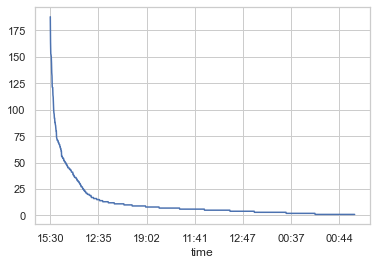

In [53]:
#A plot to show the count of accident and the time

df_join2.groupby("time")["accident_index"].count().sort_values(ascending = False).plot()

In [54]:
#To get the count of the accident per time

df5 = df_join2.groupby('time')["accident_index"].count().reset_index()

df5.rename(columns = {"accident_index": "number_of_accident"}, inplace = True)

In [55]:
df5.head()

time  number_of_accident
0  00:00                   9
1  00:01                  14
2  00:02                   3
3  00:03                   1
4  00:04                   2

In [56]:
#to have more insight from the plot the top 20 accident of motorbikes will be choosed

top_20_pedes = df5.sort_values(by = "number_of_accident", ascending=False)[:20]

In [57]:
top_20_pedes

time  number_of_accident
770  15:30                 188
740  15:00                 164
800  16:00                 153
920  18:00                 152
860  17:00                 150
830  16:30                 144
980  19:00                 135
890  17:30                 132
950  18:30                 122
680  14:00                 121
354  08:30                 121
384  09:00                 114
750  15:10                 112
760  15:20                 105
560  12:00                 100
590  12:30                  97
710  14:30                  96
755  15:15                  92
785  15:45                  92
780  15:40                  88

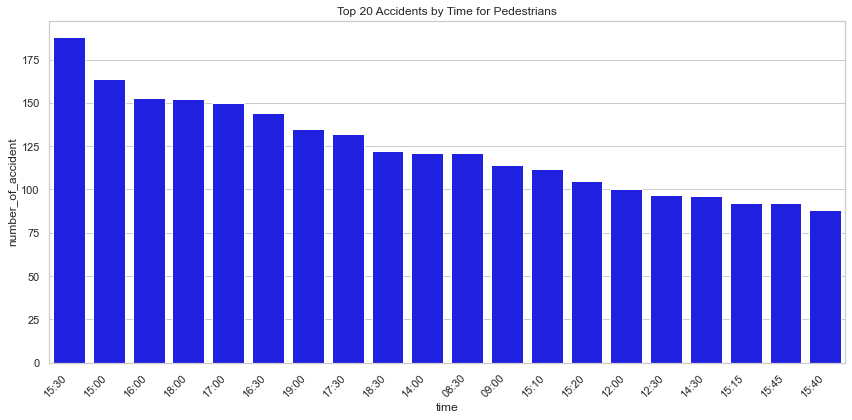

In [58]:
plot_bar_chart(top_20_pedes, 'time', 'number_of_accident', 'Top 20 Accidents by Time for Pedestrians')

### For the pedestrians days of the week

In [59]:
#To get the count of the accident per day of the week for pedestrains

df6 = df_join2.groupby('day_of_week')["accident_index"].count().reset_index()

df6.rename(columns = {"accident_index": "number_of_accident"}, inplace = True)

In [60]:
#To sort the number of accident in the days of the week by ascending order

df6_sorted = df6.sort_values(by="number_of_accident", ascending=False)

df6_sorted

day_of_week  number_of_accident
0      Friday                2543
4    Thursday                2366
5     Tuesday                2267
6   Wednesday                2247
1      Monday                2207
2    Saturday                1878
3      Sunday                1242

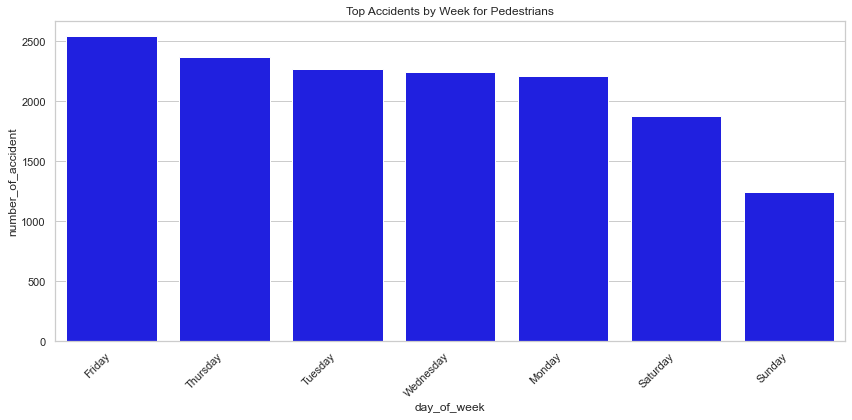

In [61]:
plot_bar_chart(df6_sorted, 'day_of_week', 'number_of_accident', 'Top Accidents by Week for Pedestrians')

### It seems there are more accident on friday from the visualization seen, so there is need to dig deep

#### To check the number of accident that happen by months

In [62]:
#to get the actual day of the week

accident['month'] = accident['date'].dt.month_name()

accident['month']

370153    February
370154       April
370155     January
370156     January
370157     January
            ...   
461347      August
461348    November
461349       April
461350    December
461351      August
Name: month, Length: 91199, dtype: object

In [63]:
#To get the count of the accident per day of the week

accident_month = accident.groupby('month')["accident_index"].count().reset_index()

accident_month.rename(columns = {"accident_index": "number_of_accident"}, inplace = True)

In [64]:
#To sort the number of accident in the days of the week by ascending order

accident_month_sorted = accident_month.sort_values(by="number_of_accident", ascending=False)

accident_month_sorted

month  number_of_accident
4     January                9591
11  September                9258
1      August                8875
10    October                8865
3    February                8546
5        July                8157
2    December                8128
9    November                7610
6        June                6721
7       March                6551
8         May                5599
0       April                3298

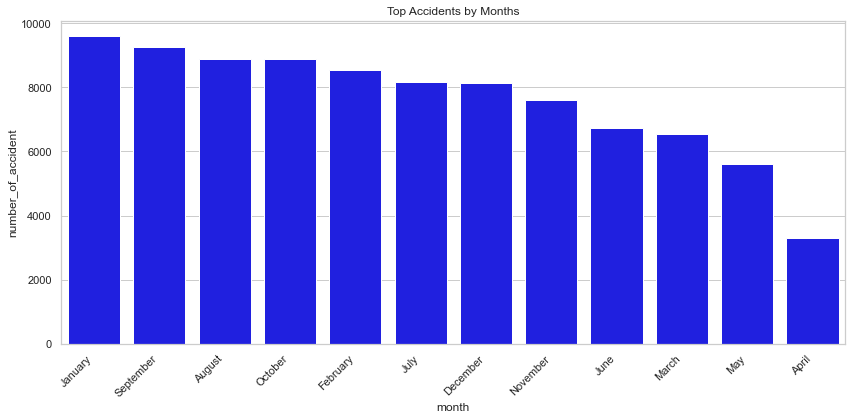

In [65]:
plot_bar_chart(accident_month_sorted, 'month', 'number_of_accident', 'Top Accidents by Months')

### To check the accident that happens on friday each month

In [66]:
# #To filter the friday accident by each month


accident_grouped = accident.groupby(['day_of_week', 'month'])['accident_index'].count().reset_index()


friday_accidents = accident_grouped[accident_grouped['day_of_week'] == 'Friday']

In [67]:
# Sort the 'friday_accidents' DataFrame in ascending order by the number of accidents
friday_accidents = friday_accidents.sort_values(by='accident_index', ascending=False)

# Rename the 'accident_index' column to 'number_of_accidents'
friday_accidents.rename(columns={'accident_index': 'number_of_accident'}, inplace=True)

In [68]:
friday_accidents

day_of_week      month  number_of_accident
4       Friday    January                1773
10      Friday    October                1714
5       Friday       July                1587
11      Friday  September                1386
3       Friday   February                1341
1       Friday     August                1270
2       Friday   December                1185
9       Friday   November                1184
7       Friday      March                1007
6       Friday       June                1001
8       Friday        May                 986
0       Friday      April                 455

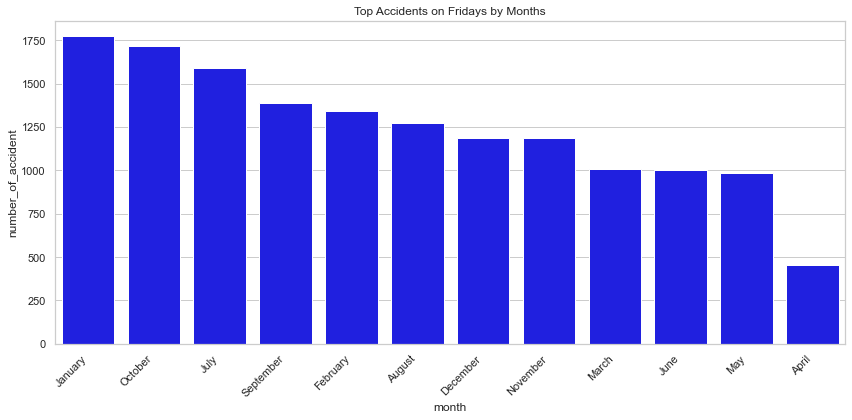

In [69]:
plot_bar_chart(friday_accidents, 'month', 'number_of_accident', 'Top Accidents on Fridays by Months')

# Features Selection

In [70]:
acc_fea = ['accident_index', 'accident_severity', 'number_of_vehicles', 'number_of_casualties', 'road_type', 'speed_limit',
           'lsoa_of_accident_location','road_surface_conditions','weather_conditions','light_conditions']
veh_fea = ['accident_index', 'vehicle_type', 'age_of_vehicle', 'engine_capacity_cc', 'age_of_driver','sex_of_driver']
cas_fea = ['accident_index', 'pedestrian_location', 'age_of_casualty', 'sex_of_casualty', 'casualty_class']

In [71]:
#To subset the data avove into this category
df_accident = accident[acc_fea]
df_vehicle = vehicle[veh_fea]
df_casualty = casualty[cas_fea]

In [72]:
df_accident.head()

accident_index  accident_severity  number_of_vehicles  \
370153  2020010219808                  3                   1   
370154  2020010220496                  3                   1   
370155  2020010228005                  3                   1   
370156  2020010228006                  2                   1   
370157  2020010228011                  3                   1   

        number_of_casualties  road_type  speed_limit  \
370153                     1          6           20   
370154                     2          6           20   
370155                     1          6           30   
370156                     1          6           30   
370157                     2          6           30   

       lsoa_of_accident_location  road_surface_conditions  weather_conditions  \
370153                 E01004576                        9                   9   
370154                 E01003034                        1                   1   
370155                 E01004726                        2                   1   
370156                 E01003617                        1                   1   
370157                 E01004763                        1                   1   

        light_conditions  
370153                 1  
370154                 1  
370155                 4  
370156                 4  
370157                 4

In [73]:
df_vehicle.head()

accident_index  vehicle_type  age_of_vehicle  engine_capacity_cc  \
681716  2020010219808             9               6                1968   
681717  2020010220496             9               2                1395   
681718  2020010228005             9              -1                  -1   
681719  2020010228006             8               8                1798   
681720  2020010228011             9               4                2993   

        age_of_driver  sex_of_driver  
681716             32              2  
681717             45              1  
681718             -1              3  
681719             44              1  
681720             20              1

In [74]:
df_casualty.head()

accident_index  pedestrian_location  age_of_casualty  sex_of_casualty  \
484748  2020010219808                    9               31                1   
484749  2020010220496                    1                2                2   
484750  2020010220496                    1                4                2   
484751  2020010228005                    5               23                1   
484752  2020010228006                    4               47                1   

        casualty_class  
484748               3  
484749               3  
484750               3  
484751               3  
484752               3

### To merge the table together

In [75]:
#To join and merge accident and vehicle data

accident_vehicle = df_accident.merge(df_vehicle, on = 'accident_index')

In [76]:
#To merge the accident_vehicle with the casualty

df_merge = accident_vehicle.merge(df_casualty, on = 'accident_index')

In [77]:
#To check the head of the data

df_merge.head()

accident_index  accident_severity  number_of_vehicles  number_of_casualties  \
0  2020010219808                  3                   1                     1   
1  2020010220496                  3                   1                     2   
2  2020010220496                  3                   1                     2   
3  2020010228005                  3                   1                     1   
4  2020010228006                  2                   1                     1   

   road_type  speed_limit lsoa_of_accident_location  road_surface_conditions  \
0          6           20                 E01004576                        9   
1          6           20                 E01003034                        1   
2          6           20                 E01003034                        1   
3          6           30                 E01004726                        2   
4          6           30                 E01003617                        1   

   weather_conditions  light_conditions  vehicle_type  age_of_vehicle  \
0                   9                 1             9               6   
1                   1                 1             9               2   
2                   1                 1             9               2   
3                   1                 4             9              -1   
4                   1                 4             8               8   

   engine_capacity_cc  age_of_driver  sex_of_driver  pedestrian_location  \
0                1968             32              2                    9   
1                1395             45              1                    1   
2                1395             45              1                    1   
3                  -1             -1              3                    5   
4                1798             44              1                    4   

   age_of_casualty  sex_of_casualty  casualty_class  
0               31                1               3  
1                2                2               3  
2                4                2               3  
3               23                1               3  
4               47                1               3

In [78]:
#To check the shape of the data

df_merge.shape

(220435, 19)

### Selecting categorical variables

In [79]:
drop_merge = df_merge.drop(['accident_index','age_of_casualty','lsoa_of_accident_location',
                  'number_of_casualties','engine_capacity_cc','age_of_driver' ,'age_of_vehicle','number_of_vehicles','speed_limit'], axis = 1)

In [80]:
drop_merge

accident_severity  road_type  road_surface_conditions  \
0                       3          6                        9   
1                       3          6                        1   
2                       3          6                        1   
3                       3          6                        2   
4                       2          6                        1   
...                   ...        ...                      ...   
220430                  2          6                        1   
220431                  2          6                        1   
220432                  3          6                        1   
220433                  3          6                        1   
220434                  3          6                        1   

        weather_conditions  light_conditions  vehicle_type  sex_of_driver  \
0                        9                 1             9              2   
1                        1                 1             9              1   
2                        1                 1             9              1   
3                        1                 4             9              3   
4                        1                 4             8              1   
...                    ...               ...           ...            ...   
220430                   1                 1             9              1   
220431                   1                 1             5              1   
220432                   1                 1             9              2   
220433                   1                 1             1              1   
220434                   1                 1             9              1   

        pedestrian_location  sex_of_casualty  casualty_class  
0                         9                1               3  
1                         1                2               3  
2                         1                2               3  
3                         5                1               3  
4                         4                1               3  
...                     ...              ...             ...  
220430                    0                1               1  
220431                    0                1               1  
220432                    0                1               1  
220433                    0                1               1  
220434                    9                1               3  

[220435 rows x 10 columns]

## Data cleaning of the Drop_ merge Table

In [81]:
drop_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220435 entries, 0 to 220434
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   accident_severity        220435 non-null  int64
 1   road_type                220435 non-null  int64
 2   road_surface_conditions  220435 non-null  int64
 3   weather_conditions       220435 non-null  int64
 4   light_conditions         220435 non-null  int64
 5   vehicle_type             220435 non-null  int64
 6   sex_of_driver            220435 non-null  int64
 7   pedestrian_location      220435 non-null  int64
 8   sex_of_casualty          220435 non-null  int64
 9   casualty_class           220435 non-null  int64
dtypes: int64(10)
memory usage: 18.5 MB


In [82]:
drop_merge.isnull().sum()

accident_severity          0
road_type                  0
road_surface_conditions    0
weather_conditions         0
light_conditions           0
vehicle_type               0
sex_of_driver              0
pedestrian_location        0
sex_of_casualty            0
casualty_class             0
dtype: int64

#### To check for unique values in all the column

In [83]:
for column in drop_merge.columns:
    unique_values = drop_merge[column].unique()
    print(f"Column '{column}': {unique_values}\n")

Column 'accident_severity': [3 2 1]

Column 'road_type': [6 2 3 7 1 9]

Column 'road_surface_conditions': [ 9  1  2  5  4  3 -1]

Column 'weather_conditions': [ 9  1  8  7  2  4  5  3  6 -1]

Column 'light_conditions': [ 1  4  5  7  6 -1]

Column 'vehicle_type': [ 9  8  3  2 11  1 90 19  4  5 21 97 20 98 10 17 23 22 18 16]

Column 'sex_of_driver': [ 2  1  3 -1]

Column 'pedestrian_location': [ 9  1  5  4  6  0 10  8  7  3  2 -1]

Column 'sex_of_casualty': [ 1  2 -1  9]

Column 'casualty_class': [3 1 2]



#### Note that the -1 input will be replaced with NaN in the columns

In [84]:
drop_merge = drop_merge.replace(-1, np.nan)

The -1 input in road_surface_conditions, weather_conditions, light_conditions, sex_of_driver, pedestrian_location, sex_of_casualty will be replaced with the mode so as to maintain data integrity and preserve the data relationship

In [85]:
columns_with_NaN = ['road_surface_conditions', 'sex_of_casualty','pedestrian_location','weather_conditions','light_conditions','sex_of_driver']

# Calculate the mode for each column
mode = drop_merge[columns_with_NaN].mode().iloc[0]

# Replace NaN with the respective mode value for each column
drop_merge[columns_with_NaN] = drop_merge[columns_with_NaN].fillna(mode)

In [86]:

categorical_columns = ['accident_severity', 'road_type','road_surface_conditions', 'weather_conditions',
                       'light_conditions', 'vehicle_type', 'sex_of_driver', 'pedestrian_location',
                       'sex_of_casualty', 'casualty_class',]

# Use pandas' get_dummies() function to create dummy variables
X = pd.get_dummies(drop_merge, columns=categorical_columns)

# Using the Apriori Algorithm

In [87]:
from mlxtend.frequent_patterns import apriori, association_rules

In [88]:
#The frequent items in the accident severity

frequent_items = apriori(X, min_support = 0.05, use_colnames=True)

C:\Users\Admin\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


In [89]:
frequent_items

support                                           itemsets
0     0.203362                              (accident_severity_2)
1     0.777445                              (accident_severity_3)
2     0.056339                                      (road_type_1)
3     0.169946                                      (road_type_3)
4     0.720652                                      (road_type_6)
...        ...                                                ...
3511  0.069676  (road_type_6, casualty_class_1, pedestrian_loc...
3512  0.083480  (road_surface_conditions_1.0, casualty_class_1...
3513  0.050046  (road_surface_conditions_1.0, sex_of_casualty_...
3514  0.077796  (road_surface_conditions_1.0, road_type_6, cas...
3515  0.060054  (road_surface_conditions_1.0, road_type_6, cas...

[3516 rows x 2 columns]

In [90]:
#Getting the association rules in the dataframe

rules_confidence = association_rules(frequent_items, metric = 'confidence', min_threshold=0.7)

In [91]:
rules_confidence

antecedents  \
0                                  (accident_severity_2)   
1                                  (accident_severity_2)   
2                                  (accident_severity_2)   
3                                  (accident_severity_2)   
4                                  (accident_severity_2)   
...                                                  ...   
16553  (road_surface_conditions_1.0, road_type_6, cas...   
16554  (road_surface_conditions_1.0, road_type_6, cas...   
16555  (road_surface_conditions_1.0, road_type_6, acc...   
16556  (road_type_6, casualty_class_1, accident_sever...   
16557  (road_type_6, accident_severity_3, light_condi...   

                                             consequents  antecedent support  \
0                                          (road_type_6)            0.203362   
1                               (weather_conditions_1.0)            0.203362   
2                                    (sex_of_driver_1.0)            0.203362   
3                              (pedestrian_location_0.0)            0.203362   
4                                     (casualty_class_1)            0.203362   
...                                                  ...                 ...   
16553  (light_conditions_1.0, pedestrian_location_0.0...            0.083013   
16554  (pedestrian_location_0.0, weather_conditions_1...            0.081230   
16555  (casualty_class_1, weather_conditions_1.0, ped...            0.077265   
16556  (road_surface_conditions_1.0, pedestrian_locat...            0.083798   
16557  (road_surface_conditions_1.0, casualty_class_1...            0.085381   

       consequent support   support  confidence      lift  leverage  \
0                0.720652  0.156667    0.770389  1.069016  0.010115   
1                0.780892  0.161399    0.793656  1.016345  0.002596   
2                0.638243  0.142541    0.700924  1.098209  0.012747   
3                0.927380  0.183161    0.900665  0.971193 -0.005433   
4                0.732325  0.143539    0.705831  0.963823 -0.005388   
...                   ...       ...         ...       ...       ...   
16553            0.543339  0.060054    0.723428  1.331447  0.014950   
16554            0.565722  0.060054    0.739305  1.306834  0.014100   
16555            0.575371  0.060054    0.777243  1.350854  0.015598   
16556            0.600263  0.060054    0.716652  1.193897  0.009753   
16557            0.508236  0.060054    0.703363  1.383930  0.016660   

       conviction  zhangs_metric  
0        1.216613       0.081041  
1        1.061855       0.020187  
2        1.209582       0.112254  
3        0.731060      -0.035897  
4        0.909938      -0.044997  
...           ...            ...  
16553    1.651143       0.271473  
16554    1.665847       0.255550  
16555    1.906240       0.281476  
16556    1.410764       0.177261  
16557    1.657799       0.303318  

[16558 rows x 10 columns]

In [92]:
#Getting the association rules in the dataframe

rules_lift = association_rules(frequent_items, metric = 'lift', min_threshold=1.04)

In [93]:
rules_lift

antecedents  \
0                  (road_type_6)   
1          (accident_severity_2)   
2            (sex_of_driver_1.0)   
3          (accident_severity_2)   
4          (sex_of_casualty_1.0)   
...                          ...   
92243  (pedestrian_location_0.0)   
92244     (light_conditions_1.0)   
92245   (weather_conditions_1.0)   
92246        (sex_of_driver_1.0)   
92247      (sex_of_casualty_1.0)   

                                             consequents  antecedent support  \
0                                  (accident_severity_2)            0.720652   
1                                          (road_type_6)            0.203362   
2                                  (accident_severity_2)            0.638243   
3                                    (sex_of_driver_1.0)            0.203362   
4                                  (accident_severity_2)            0.631982   
...                                                  ...                 ...   
92243  (road_surface_conditions_1.0, road_type_6, cas...            0.927380   
92244  (road_surface_conditions_1.0, road_type_6, cas...            0.710604   
92245  (road_surface_conditions_1.0, road_type_6, cas...            0.780892   
92246  (road_surface_conditions_1.0, road_type_6, cas...            0.638243   
92247  (road_surface_conditions_1.0, road_type_6, cas...            0.631982   

       consequent support   support  confidence      lift  leverage  \
0                0.203362  0.156667    0.217397  1.069016  0.010115   
1                0.720652  0.156667    0.770389  1.069016  0.010115   
2                0.203362  0.142541    0.223333  1.098209  0.012747   
3                0.638243  0.142541    0.700924  1.098209  0.012747   
4                0.203362  0.140649    0.222552  1.094368  0.012128   
...                   ...       ...         ...       ...       ...   
92243            0.060054  0.060054    0.064757  1.078307  0.004361   
92244            0.078876  0.060054    0.084511  1.071445  0.004004   
92245            0.062808  0.060054    0.076904  1.224442  0.011008   
92246            0.088747  0.060054    0.094093  1.060233  0.003412   
92247            0.076263  0.060054    0.095025  1.246017  0.011857   

       conviction  zhangs_metric  
0        1.017934       0.231112  
1        1.216613       0.081041  
2        1.025715       0.247199  
3        1.209582       0.112254  
4        1.024684       0.234312  
...           ...            ...  
92243    1.005028       1.000000  
92244    1.006156       0.230416  
92245    1.015271       0.836582  
92246    1.005901       0.157041  
92247    1.020732       0.536503  

[92248 rows x 10 columns]

In [94]:
# Filter the rules to show only accident severity in consequents
accident_severity_rule1 = rules_confidence[rules_confidence['consequents'] == frozenset({'accident_severity_1'})]
accident_severity_rule1

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []

In [95]:
# Filter the rules to show only accident severity in consequents
accident_severity_rule2 = rules_confidence[rules_confidence['consequents'] == frozenset({'accident_severity_2'})]
accident_severity_rule2

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []

In [96]:
# Filter the rules to show only accident severity in consequents

accident_severity_rule3 = rules_confidence[rules_confidence['consequents'] == frozenset({'accident_severity_3'})]
accident_severity_rule3

antecedents  \
5                                          (road_type_3)   
6                                          (road_type_6)   
8                          (road_surface_conditions_1.0)   
9                          (road_surface_conditions_2.0)   
10                              (weather_conditions_1.0)   
...                                                  ...   
16432  (road_surface_conditions_1.0, road_type_6, cas...   
16446  (road_type_6, casualty_class_1, pedestrian_loc...   
16460  (road_surface_conditions_1.0, casualty_class_1...   
16485  (road_surface_conditions_1.0, sex_of_casualty_...   
16534  (road_surface_conditions_1.0, road_type_6, cas...   

                 consequents  antecedent support  consequent support  \
5      (accident_severity_3)            0.169946            0.777445   
6      (accident_severity_3)            0.720652            0.777445   
8      (accident_severity_3)            0.688416            0.777445   
9      (accident_severity_3)            0.293370            0.777445   
10     (accident_severity_3)            0.780892            0.777445   
...                      ...                 ...                 ...   
16432  (accident_severity_3)            0.081230            0.777445   
16446  (accident_severity_3)            0.090467            0.777445   
16460  (accident_severity_3)            0.106122            0.777445   
16485  (accident_severity_3)            0.058067            0.777445   
16534  (accident_severity_3)            0.077796            0.777445   

        support  confidence      lift  leverage  conviction  zhangs_metric  
5      0.134321    0.790374  1.016631  0.002197    1.061680       0.019708  
6      0.549137    0.762000  0.980134 -0.011130    0.935106      -0.067649  
8      0.536299    0.779033  1.002043  0.001093    1.007187       0.006543  
9      0.225931    0.770122  0.990581 -0.002148    0.968144      -0.013278  
10     0.604246    0.773789  0.995298 -0.002854    0.983841      -0.021105  
...         ...         ...       ...       ...         ...            ...  
16432  0.062808    0.773205  0.994546 -0.000344    0.981304      -0.005933  
16446  0.069676    0.770184  0.990660 -0.000657    0.968405      -0.010259  
16460  0.083480    0.786646  1.011835  0.000976    1.043125       0.013085  
16485  0.050046    0.861875  1.108600  0.004903    1.611261       0.104000  
16534  0.060054    0.771940  0.992920 -0.000428    0.975864      -0.007673  

[1394 rows x 10 columns]

In [97]:
# Filter the lift to show only accident severity in consequents

accident_severity_lift1 = rules_lift[rules_lift['consequents'] == frozenset({'accident_severity_1'})]
accident_severity_lift1

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []

In [98]:
# Filter the lift to show only accident severity in consequents

accident_severity_lift2 = rules_lift[rules_lift['consequents'] == frozenset({'accident_severity_2'})]
accident_severity_lift2

antecedents  \
0                                          (road_type_6)   
2                                    (sex_of_driver_1.0)   
4                                  (sex_of_casualty_1.0)   
88            (road_surface_conditions_1.0, road_type_6)   
92                 (road_type_6, weather_conditions_1.0)   
...                                                  ...   
47568  (road_surface_conditions_1.0, casualty_class_1...   
47689  (road_surface_conditions_1.0, pedestrian_locat...   
47813  (road_surface_conditions_1.0, casualty_class_1...   
47937  (road_surface_conditions_1.0, casualty_class_1...   
48061  (casualty_class_1, pedestrian_location_0.0, li...   

                 consequents  antecedent support  consequent support  \
0      (accident_severity_2)            0.720652            0.203362   
2      (accident_severity_2)            0.638243            0.203362   
4      (accident_severity_2)            0.631982            0.203362   
88     (accident_severity_2)            0.500306            0.203362   
92     (accident_severity_2)            0.570041            0.203362   
...                      ...                 ...                 ...   
47568  (accident_severity_2)            0.243391            0.203362   
47689  (accident_severity_2)            0.262064            0.203362   
47813  (accident_severity_2)            0.265602            0.203362   
47937  (accident_severity_2)            0.217384            0.203362   
48061  (accident_severity_2)            0.235630            0.203362   

        support  confidence      lift  leverage  conviction  zhangs_metric  
0      0.156667    0.217397  1.069016  0.010115    1.017934       0.231112  
2      0.142541    0.223333  1.098209  0.012747    1.025715       0.247199  
4      0.140649    0.222552  1.094368  0.012128    1.024684       0.234312  
88     0.108281    0.216430  1.064263  0.006538    1.016678       0.120839  
92     0.125094    0.219447  1.079096  0.009169    1.020607       0.170477  
...         ...         ...       ...       ...         ...            ...  
47568  0.053775    0.220942  1.086451  0.004279    1.022567       0.105169  
47689  0.058503    0.223238  1.097738  0.005209    1.025589       0.120656  
47813  0.061678    0.232220  1.141906  0.007665    1.037587       0.169215  
47937  0.050260    0.231203  1.136905  0.006052    1.036214       0.153867  
48061  0.055082    0.233765  1.149506  0.007164    1.039679       0.170154  

[190 rows x 10 columns]

In [99]:
# Filter the lift to show only accident severity in consequents

accident_severity_lift3 = rules_lift[rules_lift['consequents'] == frozenset({'accident_severity_3'})]
accident_severity_lift3

antecedents  \
6                                    (sex_of_driver_3.0)   
8                                  (sex_of_casualty_2.0)   
180                        (road_type_3, vehicle_type_9)   
192                   (sex_of_casualty_2.0, road_type_3)   
198                     (sex_of_driver_3.0, road_type_6)   
...                                                  ...   
82264  (road_surface_conditions_1.0, sex_of_casualty_...   
82684  (sex_of_driver_2.0, sex_of_casualty_2.0, casua...   
87227  (road_surface_conditions_1.0, road_type_6, cas...   
88123  (road_surface_conditions_1.0, sex_of_casualty_...   
90543  (road_surface_conditions_1.0, sex_of_casualty_...   

                 consequents  antecedent support  consequent support  \
6      (accident_severity_3)            0.101395            0.777445   
8      (accident_severity_3)            0.367977            0.777445   
180    (accident_severity_3)            0.125910            0.777445   
192    (accident_severity_3)            0.064191            0.777445   
198    (accident_severity_3)            0.072112            0.777445   
...                      ...                 ...                 ...   
82264  (accident_severity_3)            0.061619            0.777445   
82684  (accident_severity_3)            0.069694            0.777445   
87227  (accident_severity_3)            0.065539            0.777445   
88123  (accident_severity_3)            0.067303            0.777445   
90543  (accident_severity_3)            0.058067            0.777445   

        support  confidence      lift  leverage  conviction  zhangs_metric  
6      0.086266    0.850790  1.094341  0.007437    1.491555       0.095936  
8      0.300084    0.815497  1.048945  0.014002    1.206240       0.073828  
180    0.102107    0.810953  1.043101  0.004219    1.177249       0.047272  
192    0.052841    0.823180  1.058828  0.002936    1.258657       0.059371  
198    0.059850    0.829957  1.067545  0.003787    1.308820       0.068189  
...         ...         ...       ...       ...         ...            ...  
82264  0.053236    0.863948  1.111266  0.005330    1.635806       0.106700  
82684  0.059941    0.860053  1.106257  0.005757    1.590288       0.103246  
87227  0.053766    0.820378  1.055224  0.002814    1.239020       0.056004  
88123  0.057450    0.853599  1.097955  0.005125    1.520180       0.095654  
90543  0.050046    0.861875  1.108600  0.004903    1.611261       0.104000  

[415 rows x 10 columns]

In [100]:
#accident_severity_rule.sample(8)

# To identify accidents in our region using clustering

In [101]:
df_merge.head()

accident_index  accident_severity  number_of_vehicles  number_of_casualties  \
0  2020010219808                  3                   1                     1   
1  2020010220496                  3                   1                     2   
2  2020010220496                  3                   1                     2   
3  2020010228005                  3                   1                     1   
4  2020010228006                  2                   1                     1   

   road_type  speed_limit lsoa_of_accident_location  road_surface_conditions  \
0          6           20                 E01004576                        9   
1          6           20                 E01003034                        1   
2          6           20                 E01003034                        1   
3          6           30                 E01004726                        2   
4          6           30                 E01003617                        1   

   weather_conditions  light_conditions  vehicle_type  age_of_vehicle  \
0                   9                 1             9               6   
1                   1                 1             9               2   
2                   1                 1             9               2   
3                   1                 4             9              -1   
4                   1                 4             8               8   

   engine_capacity_cc  age_of_driver  sex_of_driver  pedestrian_location  \
0                1968             32              2                    9   
1                1395             45              1                    1   
2                1395             45              1                    1   
3                  -1             -1              3                    5   
4                1798             44              1                    4   

   age_of_casualty  sex_of_casualty  casualty_class  
0               31                1               3  
1                2                2               3  
2                4                2               3  
3               23                1               3  
4               47                1               3

In [102]:
#To add the 'accident_index', 'police_force', 'longitude', 'latitude' 

pol_df = accident[['accident_index', 'police_force', 'longitude', 'latitude']]

df_merge1 = df_merge.merge(pol_df, on='accident_index', how='left')

In [103]:
df_merge1.head()

accident_index  accident_severity  number_of_vehicles  number_of_casualties  \
0  2020010219808                  3                   1                     1   
1  2020010220496                  3                   1                     2   
2  2020010220496                  3                   1                     2   
3  2020010228005                  3                   1                     1   
4  2020010228006                  2                   1                     1   

   road_type  speed_limit lsoa_of_accident_location  road_surface_conditions  \
0          6           20                 E01004576                        9   
1          6           20                 E01003034                        1   
2          6           20                 E01003034                        1   
3          6           30                 E01004726                        2   
4          6           30                 E01003617                        1   

   weather_conditions  light_conditions  vehicle_type  age_of_vehicle  \
0                   9                 1             9               6   
1                   1                 1             9               2   
2                   1                 1             9               2   
3                   1                 4             9              -1   
4                   1                 4             8               8   

   engine_capacity_cc  age_of_driver  sex_of_driver  pedestrian_location  \
0                1968             32              2                    9   
1                1395             45              1                    1   
2                1395             45              1                    1   
3                  -1             -1              3                    5   
4                1798             44              1                    4   

   age_of_casualty  sex_of_casualty  casualty_class  police_force  longitude  \
0               31                1               3             1  -0.254001   
1                2                2               3             1  -0.139253   
2                4                2               3             1  -0.139253   
3               23                1               3             1  -0.178719   
4               47                1               3             1  -0.001683   

    latitude  
0  51.462262  
1  51.470327  
2  51.470327  
3  51.529614  
4  51.541210

In [104]:
lsoa.head()

objectid   lsoa01cd             lsoa01nm            lsoa01nmw  \
0         1  E01000001  City of London 001A  City of London 001A   
1         2  E01000002  City of London 001B  City of London 001B   
2         3  E01000003  City of London 001C  City of London 001C   
3         4  E01000004  City of London 001D  City of London 001D   
4         5  E01000005  City of London 001E  City of London 001E   

    shape__area  shape__length                              globalid  
0  1.298652e+05    2635.772001  68cc6127-1008-4fbe-a16c-78fb089a7c43  
1  2.284189e+05    2707.986202  937edbc3-c1bf-4d35-b274-b0a1480a7c09  
2  5.905477e+04    1224.774479  2686dcaf-10b9-4736-92af-4788d4feaa69  
3  2.544551e+06   10718.466240  3c493140-0b3f-4b9a-b358-22011dc5fb89  
4  1.895782e+05    2275.809358  b569093d-788d-41be-816c-d6d7658b2311

In [105]:
#To merge the LSOA filter with the accident table


df_combine = df_merge1.merge(lsoa, left_on = 'lsoa_of_accident_location', right_on = 'lsoa01cd')

In [106]:
df_combine.shape

(201943, 29)

In [107]:
#To filter the df_combine table to the kingston upon Hull and East riding Yorksire

filter_com = df_combine[(df_combine['lsoa01nm'].str.contains('Kingston upon Hull'))|(df_combine['lsoa01nm'].str.contains('East Riding of Yorkshire'))|(df_combine['police_force'] == 16)]

In [108]:
filter_com.shape

(3985, 29)

In [109]:
#check few rows

filter_com.sample(3)

accident_index  accident_severity  number_of_vehicles  \
86621  2020160972620                  3                   4   
83675  2020160982172                  3                   2   
85072  2020160959846                  3                   2   

       number_of_casualties  road_type  speed_limit lsoa_of_accident_location  \
86621                     4          6           30                 E01013209   
83675                     1          6           40                 E01012924   
85072                     1          6           30                 E01013198   

       road_surface_conditions  weather_conditions  light_conditions  \
86621                        1                   1                 1   
83675                        1                   1                 1   
85072                        1                   1                 1   

       vehicle_type  age_of_vehicle  engine_capacity_cc  age_of_driver  \
86621             9              13                2179             48   
83675             9               6                1390             47   
85072             9               8                1242             25   

       sex_of_driver  pedestrian_location  age_of_casualty  sex_of_casualty  \
86621              3                    0               34                1   
83675              2                    0               47                2   
85072              2                    0               25                2   

       casualty_class  police_force  longitude   latitude  objectid  \
86621               1            16  -0.117097  53.545796     13209   
83675               1            16  -0.407781  53.857326     12924   
85072               1            16  -0.038898  53.563716     13198   

        lsoa01cd                       lsoa01nm  \
86621  E01013209   North East Lincolnshire 019D   
83675  E01012924  East Riding of Yorkshire 014A   
85072  E01013198   North East Lincolnshire 010B   

                           lsoa01nmw   shape__area  shape__length  \
86621   North East Lincolnshire 019D  3.905236e+05    5138.799411   
83675  East Riding of Yorkshire 014A  2.335378e+07   26470.928149   
85072   North East Lincolnshire 010B  7.772644e+05    5364.712386   

                                   globalid  
86621  e3a1088d-a943-4b8a-a395-467048852c9e  
83675  b6874ac0-11a7-4ebc-868a-7d05031f5543  
85072  272def7b-28e5-49f4-b434-3fdd37ed5b21

In [110]:
def groupRegion(region):
    if region.startswith('Kingston upon Hull'):
        return 'Kingston upon Hull'
    elif region.startswith('East Riding of Yorkshire'):
        return 'East Riding of Yorkshire'
    elif region.startswith('North East Lincolnshire'):
        return 'North East Lincolnshire'
    else:
        return 'North Lincolnshire'

In [111]:
filter_com['Region']=filter_com['lsoa01nm'].apply(lambda x: groupRegion(x))

In [112]:
filter_com.sample(2)

accident_index  accident_severity  number_of_vehicles  \
85589  2020160941968                  3                   2   
84771  2020160977991                  3                   2   

       number_of_casualties  road_type  speed_limit lsoa_of_accident_location  \
85589                     1          6           30                 E01012869   
84771                     2          6           30                 E01013142   

       road_surface_conditions  weather_conditions  light_conditions  \
85589                        1                   1                 4   
84771                        1                   1                 4   

       vehicle_type  age_of_vehicle  engine_capacity_cc  age_of_driver  \
85589             1              -1                  -1             56   
84771             9               5                1560             65   

       sex_of_driver  pedestrian_location  age_of_casualty  sex_of_casualty  \
85589              2                    0               56                2   
84771              1                    0               26                1   

       casualty_class  police_force  longitude   latitude  objectid  \
85589               1            16  -0.353680  53.767391     12869   
84771               2            16  -0.072485  53.566931     13142   

        lsoa01cd                      lsoa01nm                     lsoa01nmw  \
85589  E01012869       Kingston upon Hull 015C       Kingston upon Hull 015C   
84771  E01013142  North East Lincolnshire 002D  North East Lincolnshire 002D   

         shape__area  shape__length                              globalid  \
85589  170049.461594    2502.521301  e953207f-7e1f-4015-95fd-cac680e49396   
84771  239981.468048    3672.035237  685f926c-3eda-4808-a1df-0513a4bb0643   

                        Region  
85589       Kingston upon Hull  
84771  North East Lincolnshire

In [113]:
filter_com['Region'].unique()

array(['Kingston upon Hull', 'North Lincolnshire',
       'North East Lincolnshire', 'East Riding of Yorkshire'],
      dtype=object)

In [114]:
columns_drop = ['accident_index','lsoa_of_accident_location','objectid','lsoa01cd','lsoa01nm','lsoa01nmw',
               'shape__area','shape__length','globalid','accident_severity','number_of_vehicles','number_of_casualties',
               'road_type','speed_limit','road_surface_conditions','weather_conditions','age_of_driver','pedestrian_location',
               'age_of_casualty','sex_of_casualty','casualty_class','light_conditions',]

In [115]:
new_df = filter_com.drop(columns_drop, axis = 1)

In [116]:
columns_drop = ['vehicle_type','age_of_vehicle','engine_capacity_cc','sex_of_driver']

In [117]:
new_df1 = new_df.drop(columns_drop, axis = 1)

In [118]:
new_df1

police_force  longitude   latitude                    Region
83493            16  -0.393424  53.744936        Kingston upon Hull
83494            16  -0.393424  53.744936        Kingston upon Hull
83495            16  -0.400627  53.744520        Kingston upon Hull
83496            16  -0.400627  53.744520        Kingston upon Hull
83497            16  -0.400523  53.744482        Kingston upon Hull
...             ...        ...        ...                       ...
87473            16  -0.408728  53.843568  East Riding of Yorkshire
87474            16  -0.408728  53.843568  East Riding of Yorkshire
87475            16  -0.408728  53.843568  East Riding of Yorkshire
87476            16  -0.428826  53.743858  East Riding of Yorkshire
87477            16  -0.428826  53.743858  East Riding of Yorkshire

[3985 rows x 4 columns]

In [119]:
new_df1.isnull().sum()

police_force    0
longitude       0
latitude        0
Region          0
dtype: int64

# Clustering

In [120]:
#importing the libraties needed
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids 
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [121]:
X = np.array(list(zip(new_df1['longitude'],new_df1['latitude'])))

X

array([[-0.393424, 53.744936],
       [-0.393424, 53.744936],
       [-0.400627, 53.74452 ],
       ...,
       [-0.408728, 53.843568],
       [-0.428826, 53.743858],
       [-0.428826, 53.743858]])

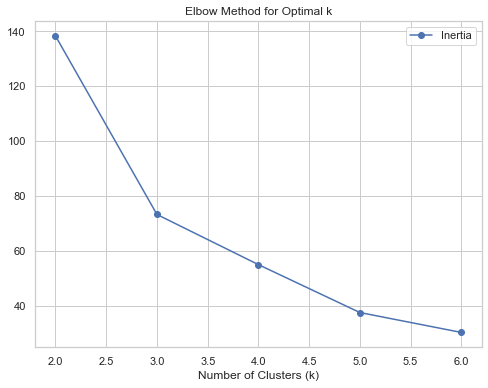

In [122]:
inertia = []
K = range(2,7)

for k in K:
    # Calculate inertia
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    inertia.append(km.inertia_)


# Plotting the Inertia 

plt.figure(figsize=(8, 6))
plt.plot(K, inertia, marker='o', label='Inertia')
plt.xlabel('Number of Clusters (k)')
plt.title('Elbow Method for Optimal k')
plt.legend()
plt.show()

In [123]:
#finding the elbow using kneed locator
from kneed import KneeLocator
kl = KneeLocator(range(2, 7), inertia, curve="convex", direction="decreasing")
kl.elbow

3

In [124]:
inertia

[138.38158504857438,
 73.28282703709176,
 55.001942172102375,
 37.53029945186255,
 30.275117077449764]

In [125]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [126]:
kmeans_labels=kmeans.predict(X)
centriods= kmeans.cluster_centers_

In [127]:
centriods

array([[-0.81495043, 53.80843243],
       [-0.3528641 , 53.78984356],
       [-0.6424859 , 53.58335417],
       [-0.08972053, 53.57565039]])

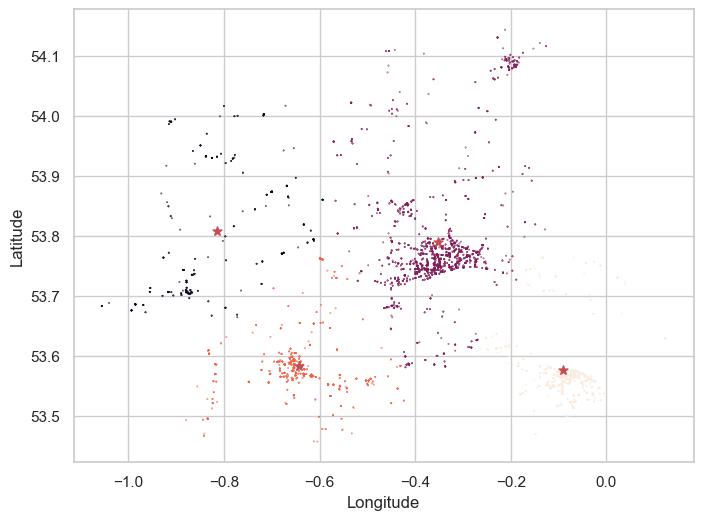

In [128]:
# Create the scatter plot
plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(X[:, 0], X[:, 1], s=0.1, rasterized=True, c=kmeans_labels)
plt.scatter(centriods.T[0], centriods.T[1], c="r", marker="*", s=45, rasterized=True)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

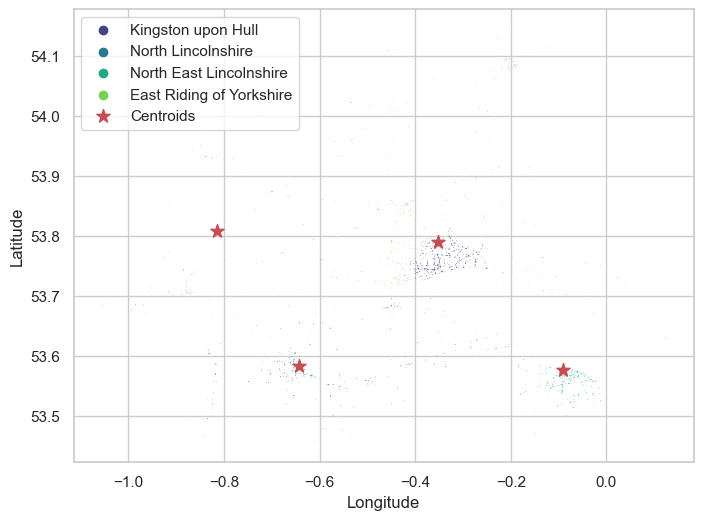

In [129]:


# Create the scatter plot
plt.figure(figsize=(8, 6), dpi=100)

# Use seaborn scatterplot to add hue based on the 'region_name'
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=new_df1['Region'], s=0.1, rasterized=True, palette='viridis')

# Add centroids
plt.scatter(centriods.T[0], centriods.T[1], c="r", marker="*", s=100, label="Centroids", rasterized=True)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

In [130]:
import folium
import itertools

# Create a folium map centered around the calculated coordinates
map_center = [X[:, 1].mean(), X[:, 0].mean()]
my_map = folium.Map(location=map_center, zoom_start=10)

# Create a cycle of cluster colors to cover all clusters
cluster_colors = itertools.cycle(['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink', 'gray', 'cyan', 'magenta'])

for cluster_num in range(len(centriods)):
    cluster_points_lat = X[kmeans_labels == cluster_num, 1]
    cluster_points_lon = X[kmeans_labels == cluster_num, 0]
    color = next(cluster_colors)
    for lat, lon in zip(cluster_points_lat, cluster_points_lon):
        folium.CircleMarker([lat, lon], radius=2, color=color, fill=True, fill_color=color, fill_opacity=0.6).add_to(my_map)

# Add centroids to the map
for lat, lon in centriods:
    folium.Marker([lat, lon], icon=folium.Icon(color='red', icon='star')).add_to(my_map)

# Display the map
my_map


In [131]:
kMedoids = KMedoids(n_clusters = 4, random_state = 0)
kMedoids.fit(X)

KMedoids(n_clusters=4, random_state=0)

In [132]:
centroid=kMedoids.cluster_centers_
centroid

array([[-0.662783, 53.596242],
       [-0.388211, 53.753145],
       [-0.083752, 53.560873],
       [-0.303066, 53.776753]])

In [133]:
kmedoids_labels=kMedoids.labels_
kmedoids_labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

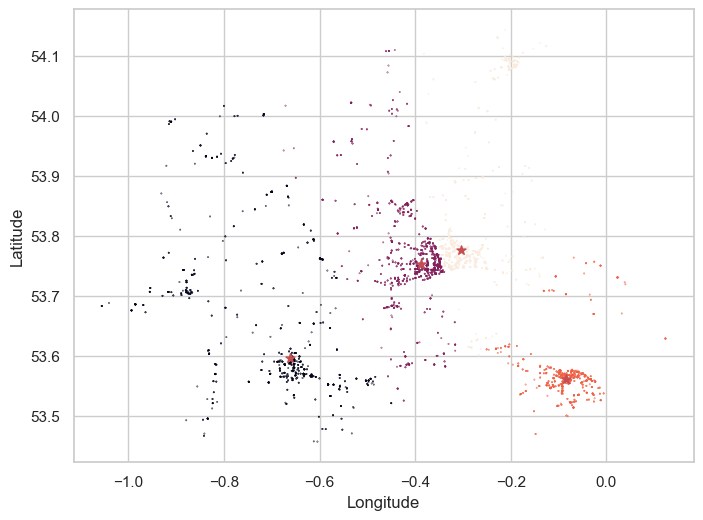

In [134]:
# Create the scatter plot
plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(X[:, 0], X[:, 1], s=0.1, rasterized=True, c=kmedoids_labels) 
plt.scatter(centroid[:, 0], centroid[:, 1], c="r", marker="*", s=45, rasterized=True)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

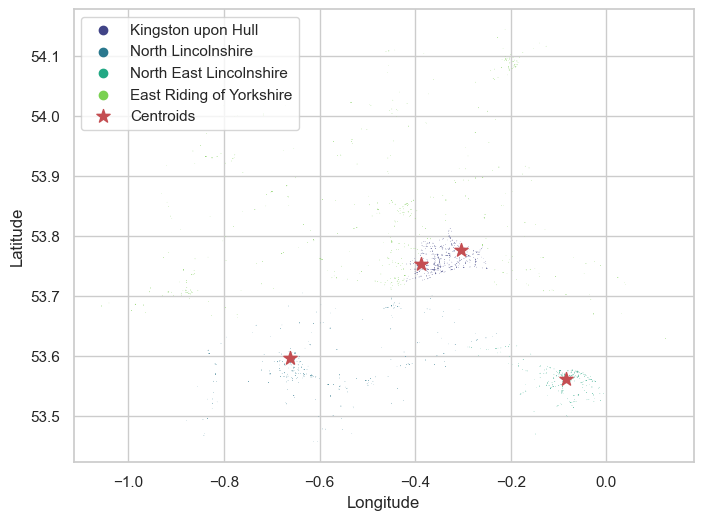

In [135]:


# Create the scatter plot
plt.figure(figsize=(8, 6), dpi=100)

# Use seaborn scatterplot to add hue based on the 'region_name'
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=new_df1['Region'], s=0.1, rasterized=True, palette='viridis')

# Add centroids
plt.scatter(centroid[:, 0], centroid[:, 1], c="r", marker="*", s=100, label="Centroids", rasterized=True)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()


In [136]:
# Perform KMeans clustering and compute silhouette score
kmeans = KMeans(n_clusters=4) 
kmeans_labels = kmeans.fit_predict(X)
kmeans_silhouette_score = silhouette_score(X, kmeans_labels)

# Perform KMedoids clustering and compute silhouette score
kmedoids = KMedoids(n_clusters=4) 
kmedoids_labels = kmedoids.fit_predict(X)
kmedoids_silhouette_score = silhouette_score(X, kmedoids_labels)

print("Silhouette Score for K-Means:", kmeans_silhouette_score)
print("Silhouette Score for K-Medoids:", kmedoids_silhouette_score)

Silhouette Score for K-Means: 0.5821146205783678
Silhouette Score for K-Medoids: 0.4110319653535337


# Outlier Detection  for Humberside region

In [137]:
filter_com.head()

accident_index  accident_severity  number_of_vehicles  \
83493  2020160914930                  3                   2   
83494  2020160914930                  3                   2   
83495  2020160918418                  3                   2   
83496  2020160918418                  3                   2   
83497  2020160936879                  3                   2   

       number_of_casualties  road_type  speed_limit lsoa_of_accident_location  \
83493                     1          6           30                 E01012777   
83494                     1          6           30                 E01012777   
83495                     1          3           30                 E01012777   
83496                     1          3           30                 E01012777   
83497                     1          6           30                 E01012777   

       road_surface_conditions  weather_conditions  light_conditions  \
83493                        1                   1                 1   
83494                        1                   1                 1   
83495                        2                   1                 1   
83496                        2                   1                 1   
83497                        1                   1                 4   

       vehicle_type  age_of_vehicle  engine_capacity_cc  age_of_driver  \
83493             9              11                1248             24   
83494            19               5                1968             48   
83495             9               4                1997             34   
83496             1              -1                  -1             61   
83497             9               4                1461             22   

       sex_of_driver  pedestrian_location  age_of_casualty  sex_of_casualty  \
83493              1                    0               24                1   
83494              1                    0               24                1   
83495              2                    0               61                1   
83496              1                    0               61                1   
83497              2                    0               59                1   

       casualty_class  police_force  longitude   latitude  objectid  \
83493               1            16  -0.393424  53.744936     12777   
83494               1            16  -0.393424  53.744936     12777   
83495               1            16  -0.400627  53.744520     12777   
83496               1            16  -0.400627  53.744520     12777   
83497               1            16  -0.400523  53.744482     12777   

        lsoa01cd                 lsoa01nm                lsoa01nmw  \
83493  E01012777  Kingston upon Hull 028E  Kingston upon Hull 028E   
83494  E01012777  Kingston upon Hull 028E  Kingston upon Hull 028E   
83495  E01012777  Kingston upon Hull 028E  Kingston upon Hull 028E   
83496  E01012777  Kingston upon Hull 028E  Kingston upon Hull 028E   
83497  E01012777  Kingston upon Hull 028E  Kingston upon Hull 028E   

        shape__area  shape__length                              globalid  \
83493  356750.94548    3963.099631  4c068a55-c2d9-426c-9cfa-94742ef4a3ff   
83494  356750.94548    3963.099631  4c068a55-c2d9-426c-9cfa-94742ef4a3ff   
83495  356750.94548    3963.099631  4c068a55-c2d9-426c-9cfa-94742ef4a3ff   
83496  356750.94548    3963.099631  4c068a55-c2d9-426c-9cfa-94742ef4a3ff   
83497  356750.94548    3963.099631  4c068a55-c2d9-426c-9cfa-94742ef4a3ff   

                   Region  
83493  Kingston upon Hull  
83494  Kingston upon Hull  
83495  Kingston upon Hull  
83496  Kingston upon Hull  
83497  Kingston upon Hull

In [138]:
#checking the statistical summary
filter_com.describe()

accident_severity  number_of_vehicles  number_of_casualties  \
count        3985.000000         3985.000000           3985.000000   
mean            2.764115            2.129737              1.660979   
std             0.466301            0.738011              1.136624   
min             1.000000            1.000000              1.000000   
25%             3.000000            2.000000              1.000000   
50%             3.000000            2.000000              1.000000   
75%             3.000000            2.000000              2.000000   
max             3.000000            7.000000             10.000000   

         road_type  speed_limit  road_surface_conditions  weather_conditions  \
count  3985.000000  3985.000000              3985.000000         3985.000000   
mean      5.194228    37.749059                 1.255960            1.419072   
std       1.605843    13.393836                 0.466477            1.303008   
min       1.000000    20.000000                -1.000000            1.000000   
25%       6.000000    30.000000                 1.000000            1.000000   
50%       6.000000    30.000000                 1.000000            1.000000   
75%       6.000000    40.000000                 1.000000            1.000000   
max       9.000000    70.000000                 4.000000            9.000000   

       light_conditions  vehicle_type  age_of_vehicle  engine_capacity_cc  \
count       3985.000000   3985.000000     3985.000000         3985.000000   
mean           1.928482     11.756336        6.208030         1431.259222   
std            1.589579     16.862934        6.502559         1834.053811   
min            1.000000      1.000000       -1.000000           -1.000000   
25%            1.000000      9.000000       -1.000000           -1.000000   
50%            1.000000      9.000000        5.000000         1390.000000   
75%            4.000000      9.000000       11.000000         1896.000000   
max            7.000000     98.000000       88.000000        16400.000000   

       age_of_driver  sex_of_driver  pedestrian_location  age_of_casualty  \
count    3985.000000    3985.000000          3985.000000      3985.000000   
mean       33.835132       1.466499             0.313676        35.648432   
std        21.785663       0.654337             1.424991        19.857717   
min        -1.000000       1.000000             0.000000        -1.000000   
25%        21.000000       1.000000             0.000000        21.000000   
50%        33.000000       1.000000             0.000000        33.000000   
75%        49.000000       2.000000             0.000000        49.000000   
max        93.000000       3.000000            10.000000        93.000000   

       sex_of_casualty  casualty_class  police_force    longitude  \
count      3985.000000     3985.000000        3985.0  3985.000000   
mean          1.379172        1.303890          16.0    -0.391464   
std           0.491410        0.569689           0.0     0.226677   
min          -1.000000        1.000000          16.0    -1.055770   
25%           1.000000        1.000000          16.0    -0.533235   
50%           1.000000        1.000000          16.0    -0.360487   
75%           2.000000        1.000000          16.0    -0.255547   
max           2.000000        3.000000          16.0     0.123813   

          latitude      objectid   shape__area  shape__length  
count  3985.000000   3985.000000  3.985000e+03    3985.000000  
mean     53.714218  13045.172898  1.079585e+07   14488.388775  
std       0.135278    177.373579  2.035220e+07   15948.571478  
min      53.456614  12756.000000  1.213100e+05    1783.725803  
25%      53.576588  12875.000000  3.645705e+05    3826.676972  
50%      53.742944  13034.000000  1.017410e+06    6913.943941  
75%      53.774873  13211.000000  1.203971e+07   19342.550795  
max      54.143923  13334.000000  1.252838e+08   83072.645393

In [139]:
new_filter = filter_com.drop(['lsoa01cd','accident_index','lsoa_of_accident_location','longitude','latitude',
                              'objectid','shape__area','lsoa01nm','lsoa01nmw','globalid','shape__length'], axis = 1)

In [140]:
new_filter.head()

accident_severity  number_of_vehicles  number_of_casualties  road_type  \
83493                  3                   2                     1          6   
83494                  3                   2                     1          6   
83495                  3                   2                     1          3   
83496                  3                   2                     1          3   
83497                  3                   2                     1          6   

       speed_limit  road_surface_conditions  weather_conditions  \
83493           30                        1                   1   
83494           30                        1                   1   
83495           30                        2                   1   
83496           30                        2                   1   
83497           30                        1                   1   

       light_conditions  vehicle_type  age_of_vehicle  engine_capacity_cc  \
83493                 1             9              11                1248   
83494                 1            19               5                1968   
83495                 1             9               4                1997   
83496                 1             1              -1                  -1   
83497                 4             9               4                1461   

       age_of_driver  sex_of_driver  pedestrian_location  age_of_casualty  \
83493             24              1                    0               24   
83494             48              1                    0               24   
83495             34              2                    0               61   
83496             61              1                    0               61   
83497             22              2                    0               59   

       sex_of_casualty  casualty_class  police_force              Region  
83493                1               1            16  Kingston upon Hull  
83494                1               1            16  Kingston upon Hull  
83495                1               1            16  Kingston upon Hull  
83496                1               1            16  Kingston upon Hull  
83497                1               1            16  Kingston upon Hull

In [141]:
from sklearn.ensemble import IsolationForest

In [142]:
#coverting the region to one hot encoding

new_filter = pd.get_dummies(new_filter)

In [143]:
new_filter.head()

accident_severity  number_of_vehicles  number_of_casualties  road_type  \
83493                  3                   2                     1          6   
83494                  3                   2                     1          6   
83495                  3                   2                     1          3   
83496                  3                   2                     1          3   
83497                  3                   2                     1          6   

       speed_limit  road_surface_conditions  weather_conditions  \
83493           30                        1                   1   
83494           30                        1                   1   
83495           30                        2                   1   
83496           30                        2                   1   
83497           30                        1                   1   

       light_conditions  vehicle_type  age_of_vehicle  engine_capacity_cc  \
83493                 1             9              11                1248   
83494                 1            19               5                1968   
83495                 1             9               4                1997   
83496                 1             1              -1                  -1   
83497                 4             9               4                1461   

       age_of_driver  sex_of_driver  pedestrian_location  age_of_casualty  \
83493             24              1                    0               24   
83494             48              1                    0               24   
83495             34              2                    0               61   
83496             61              1                    0               61   
83497             22              2                    0               59   

       sex_of_casualty  casualty_class  police_force  \
83493                1               1            16   
83494                1               1            16   
83495                1               1            16   
83496                1               1            16   
83497                1               1            16   

       Region_East Riding of Yorkshire  Region_Kingston upon Hull  \
83493                                0                          1   
83494                                0                          1   
83495                                0                          1   
83496                                0                          1   
83497                                0                          1   

       Region_North East Lincolnshire  Region_North Lincolnshire  
83493                               0                          0  
83494                               0                          0  
83495                               0                          0  
83496                               0                          0  
83497                               0                          0

In [144]:
#creating the model

iforest = IsolationForest()

iforest.fit(new_filter)

pred = iforest.predict(new_filter)

In [145]:
pred

array([ 1,  1,  1, ..., -1,  1,  1])

In [146]:
print(pred[:100])

[ 1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1
 -1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1]


so based on the iforset model the 1 shows the inliers while the -1 show the outliers in my dataset which is the unsual entries in the dataset

In [147]:
new_filter['iforest_outlier'] = pred

In [148]:
#to show the rows where the iforest column is -1

new = new_filter[new_filter['iforest_outlier'] == -1]

new

accident_severity  number_of_vehicles  number_of_casualties  road_type  \
83499                  3                   1                     1          3   
83514                  1                   2                     2          6   
83515                  1                   2                     2          6   
83516                  1                   2                     2          6   
83517                  1                   2                     2          6   
...                  ...                 ...                   ...        ...   
87460                  3                   1                     1          6   
87472                  3                   5                     1          6   
87473                  3                   5                     1          6   
87474                  3                   5                     1          6   
87475                  3                   5                     1          6   

       speed_limit  road_surface_conditions  weather_conditions  \
83499           30                        1                   1   
83514           60                        2                   7   
83515           60                        2                   7   
83516           60                        2                   7   
83517           60                        2                   7   
...            ...                      ...                 ...   
87460           60                        4                   1   
87472           30                        2                   1   
87473           30                        2                   1   
87474           30                        2                   1   
87475           30                        2                   1   

       light_conditions  vehicle_type  age_of_vehicle  engine_capacity_cc  \
83499                 4            11               1                6700   
83514                 1            19               9                1996   
83515                 1            19               9                1996   
83516                 1            11               7                4461   
83517                 1            11               7                4461   
...                 ...           ...             ...                 ...   
87460                 6             9               6                1229   
87472                 4             9              -1                  -1   
87473                 4             9              -1                  -1   
87474                 4             9              -1                  -1   
87475                 4             9              -1                  -1   

       age_of_driver  sex_of_driver  pedestrian_location  age_of_casualty  \
83499             58              1                    6               25   
83514             44              1                    0               44   
83515             44              1                    0               48   
83516             48              2                    0               44   
83517             48              2                    0               48   
...              ...            ...                  ...              ...   
87460             24              2                    0               24   
87472             -1              3                    0               29   
87473             -1              3                    0               29   
87474             -1              3                    0               29   
87475             -1              3                    0               29   

       sex_of_casualty  casualty_class  police_force  \
83499                2               3            16   
83514                1               1            16   
83515                2               1            16   
83516                1               1            16   
83517                2               1            16   
...                ...             ...     

In [149]:
columns_with_outliers = new_filter.columns[new_filter.eq(-1).any()].tolist()
print(columns_with_outliers)

['road_surface_conditions', 'age_of_vehicle', 'engine_capacity_cc', 'age_of_driver', 'age_of_casualty', 'sex_of_casualty', 'iforest_outlier']


So the columns with the -1 which is the outlier and an usual entries are: 'road_surface_conditions', 'age_of_vehicle', 'engine_capacity_cc', 'age_of_driver', 'age_of_casualty', 'sex_of_casualty',

In [150]:
new_filter = new_filter.drop("iforest_outlier", axis=1)

# Data Cleaning

- The -1 in the data will be replace with NaN
- The continous variables having NaN will be replaced by the median
- The categorical variables having NaN will be replaced by the mode

-The continous column are age_of_vehicle, age_of_driver, age_of_casualty, engine_capacity_cc

-The categorical column are road_surface_conditions, sex_of_casualty

In [151]:
new_filter1 = new_filter.replace(-1, np.nan)

In [152]:
#To change the continous variable with the median

columns_with_NaN = ['age_of_vehicle', 'engine_capacity_cc', 'age_of_driver', 'age_of_casualty']

# Calculate the median for each column
medians = new_filter1[columns_with_NaN].median()

# Replace NaN with the respective median value for each column
new_filter1[columns_with_NaN] = new_filter1[columns_with_NaN].fillna(medians)

In [153]:
columns_with_NaN = ['road_surface_conditions', 'sex_of_casualty']

# Calculate the mode for each column
mode = new_filter1[columns_with_NaN].mode().iloc[0]

# Replace NaN with the respective mode value for each column
new_filter1[columns_with_NaN] = new_filter1[columns_with_NaN].fillna(mode)

In [154]:
new_filter1

accident_severity  number_of_vehicles  number_of_casualties  road_type  \
83493                  3                   2                     1          6   
83494                  3                   2                     1          6   
83495                  3                   2                     1          3   
83496                  3                   2                     1          3   
83497                  3                   2                     1          6   
...                  ...                 ...                   ...        ...   
87473                  3                   5                     1          6   
87474                  3                   5                     1          6   
87475                  3                   5                     1          6   
87476                  3                   2                     1          6   
87477                  3                   2                     1          6   

       speed_limit  road_surface_conditions  weather_conditions  \
83493           30                      1.0                   1   
83494           30                      1.0                   1   
83495           30                      2.0                   1   
83496           30                      2.0                   1   
83497           30                      1.0                   1   
...            ...                      ...                 ...   
87473           30                      2.0                   1   
87474           30                      2.0                   1   
87475           30                      2.0                   1   
87476           30                      1.0                   1   
87477           30                      1.0                   1   

       light_conditions  vehicle_type  age_of_vehicle  engine_capacity_cc  \
83493                 1             9            11.0              1248.0   
83494                 1            19             5.0              1968.0   
83495                 1             9             4.0              1997.0   
83496                 1             1             8.0              1591.0   
83497                 4             9             4.0              1461.0   
...                 ...           ...             ...                 ...   
87473                 4             9             8.0              1591.0   
87474                 4             9             8.0              1591.0   
87475                 4             9             8.0              1591.0   
87476                 1             1             8.0              1591.0   
87477                 1             9             8.0              1591.0   

       age_of_driver  sex_of_driver  pedestrian_location  age_of_casualty  \
83493           24.0              1                    0             24.0   
83494           48.0              1                    0             24.0   
83495           34.0              2                    0             61.0   
83496           61.0              1                    0             61.0   
83497           22.0              2                    0             59.0   
...              ...            ...                  ...              ...   
87473           37.0              3                    0             29.0   
87474           37.0              3                    0             29.0   
87475           37.0              3                    0             29.0   
87476           10.0              1                    0             10.0   
87477           37.0              1                    0             10.0   

       sex_of_casualty  casualty_class  police_force  \
83493              1.0               1            16   
83494              1.0               1            16   
83495              1.0               1            16   
83496              1.0               1            16   
83497              1.0               1            16   
...                ...             ...     

In [155]:
new_filter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3985 entries, 83493 to 87477
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   accident_severity                3985 non-null   int64  
 1   number_of_vehicles               3985 non-null   int64  
 2   number_of_casualties             3985 non-null   int64  
 3   road_type                        3985 non-null   int64  
 4   speed_limit                      3985 non-null   int64  
 5   road_surface_conditions          3985 non-null   float64
 6   weather_conditions               3985 non-null   int64  
 7   light_conditions                 3985 non-null   int64  
 8   vehicle_type                     3985 non-null   int64  
 9   age_of_vehicle                   3985 non-null   float64
 10  engine_capacity_cc               3985 non-null   float64
 11  age_of_driver                    3985 non-null   float64
 12  sex_of_driver  

In [156]:
#To check the null values

new_filter1.isnull().sum()

accident_severity                  0
number_of_vehicles                 0
number_of_casualties               0
road_type                          0
speed_limit                        0
road_surface_conditions            0
weather_conditions                 0
light_conditions                   0
vehicle_type                       0
age_of_vehicle                     0
engine_capacity_cc                 0
age_of_driver                      0
sex_of_driver                      0
pedestrian_location                0
age_of_casualty                    0
sex_of_casualty                    0
casualty_class                     0
police_force                       0
Region_East Riding of Yorkshire    0
Region_Kingston upon Hull          0
Region_North East Lincolnshire     0
Region_North Lincolnshire          0
dtype: int64

In [157]:
#To check the value count of the target

new_filter1.accident_severity.value_counts()

3    3119
2     792
1      74
Name: accident_severity, dtype: int64

Note that the data is imbalanced

In [158]:
#select the features and target

X = new_filter1.drop('accident_severity', axis = 1)
y = new_filter1['accident_severity'] == 1

In [159]:
#To split the data into the training and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=0)

### Using the Random Forest Model

In [160]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [161]:
rf = RandomForestClassifier(random_state = 0)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [162]:
#Function to compute different metrics to check performance of regression model

 

def model_performance_classification(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics to check regression model performance

 

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # predicting using the independent variables
    pred_proba = model.predict_proba(predictors)[:, 1]
    # convert the probability to class
    pred_class = np.round(pred_proba > threshold)

 

    # compute accuracy, recall, precision, and F1 score
    acc = accuracy_score(target, pred_class)
    recall = recall_score(target, pred_class, average="weighted")
    precision = precision_score(target, pred_class, average="weighted",zero_division=0)
    f1 = f1_score(target, pred_class, average="weighted")

 

    # create a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1,
        },
        index=[0],
    )

 

    # create a confusion matrix
    conf = confusion_matrix(target, pred_class)

 

    # plot the confusion matrix with color-coded sections
    plt.figure(figsize=(8, 5))
    sns.heatmap(
        conf,
        annot=True,
        fmt="g",
        cmap=sns.color_palette("Blues", as_cmap=True),
        cbar=False,
    )
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.title("Confusion Matrix", fontweight="bold")
    plt.show()

 

    return df_perf

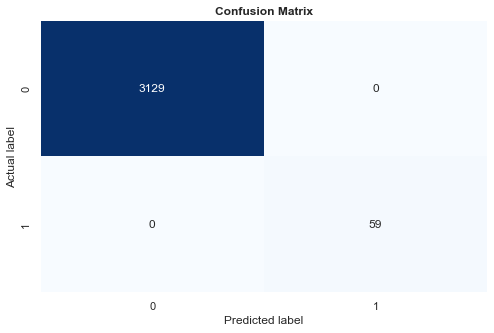

Accuracy  Recall  Precision  F1-score
0       1.0     1.0        1.0       1.0

In [163]:
rf_train = model_performance_classification(rf, X_train, y_train)

rf_train

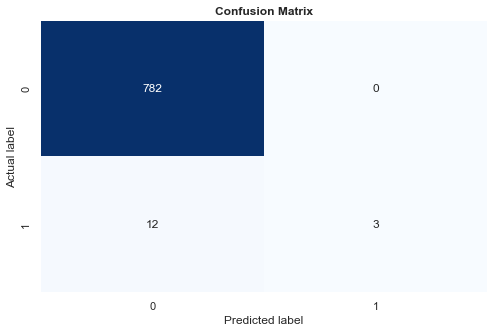

Accuracy    Recall  Precision  F1-score
0  0.984944  0.984944   0.985171  0.979982

In [164]:
rf_test = model_performance_classification(rf, X_test, y_test)

rf_test

### To check outlier for all whole accident  dataset

# Features selection

In [165]:
df_combine.shape

(201943, 29)

In [166]:
df_combine.sample(2)

accident_index  accident_severity  number_of_vehicles  \
56257   202006E467883                  3                   2   
176438  2020470951214                  2                   2   

        number_of_casualties  road_type  speed_limit  \
56257                      1          3           30   
176438                     1          6           60   

       lsoa_of_accident_location  road_surface_conditions  weather_conditions  \
56257                  E01005113                        2                   1   
176438                 E01031613                        1                   1   

        light_conditions  vehicle_type  age_of_vehicle  engine_capacity_cc  \
56257                  4             9              10                2987   
176438                 1            19               4                2198   

        age_of_driver  sex_of_driver  pedestrian_location  age_of_casualty  \
56257              43              1                    0               43   
176438             38              1                    0               60   

        sex_of_casualty  casualty_class  police_force  longitude   latitude  \
56257                 1               1             6  -2.300598  53.400944   
176438                1               1            47  -0.470836  50.998705   

        objectid   lsoa01cd         lsoa01nm        lsoa01nmw   shape__area  \
56257       5113  E01005113  Manchester 047C  Manchester 047C  2.535671e+05   
176438     31613  E01031613     Horsham 010C     Horsham 010C  1.152384e+07   

        shape__length                              globalid  
56257     4603.044664  649bdaac-21ae-47c5-911a-a83ae0abfbca  
176438   30152.590333  039150a4-2237-428c-8b63-20c08cf86cfb

In [167]:
#To add the 'urban_or_rural_area' to the data

pol_df1 = accident[['accident_index', 'urban_or_rural_area']]

df_merge12 = df_combine.merge(pol_df1, on='accident_index', how='left')

In [168]:
df_merge12.sample(2)

accident_index  accident_severity  number_of_vehicles  \
101347  2020220948373                  3                   2   
42758   2020010272416                  3                   2   

        number_of_casualties  road_type  speed_limit  \
101347                     2          6           60   
42758                      1          6           30   

       lsoa_of_accident_location  road_surface_conditions  weather_conditions  \
101347                 E01032205                        1                   1   
42758                  E01000823                        1                   1   

        light_conditions  vehicle_type  age_of_vehicle  engine_capacity_cc  \
101347                 1             9              15                1229   
42758                  1            19               4                1560   

        age_of_driver  sex_of_driver  pedestrian_location  age_of_casualty  \
101347             84              1                    0               50   
42758              38              1                    0               31   

        sex_of_casualty  casualty_class  police_force  longitude   latitude  \
101347                2               2            22  -2.242118  52.103995   
42758                 1               1             1   0.020956  51.414139   

        objectid   lsoa01cd            lsoa01nm           lsoa01nmw  \
101347     32205  E01032205  Malvern Hills 005A  Malvern Hills 005A   
42758        823  E01000823        Bromley 008E        Bromley 008E   

         shape__area  shape__length                              globalid  \
101347  2.238802e+07   30976.725756  a64ad44c-bf83-437b-afc9-065b19e32560   
42758   2.444363e+05    3575.252358  15df9c3f-1509-418d-8466-cb98bc80ac1a   

        urban_or_rural_area  
101347                    2  
42758                     1

In [169]:
df = df_merge12.drop(['lsoa01cd','accident_index','lsoa_of_accident_location','longitude','latitude',
                              'objectid','lsoa01cd','shape__area','lsoa01nmw','globalid','shape__length'], axis = 1)

In [170]:
df.shape

(201943, 20)

In [171]:
df

accident_severity  number_of_vehicles  number_of_casualties  \
0                       3                   1                     1   
1                       2                   2                     1   
2                       2                   2                     1   
3                       3                   2                     1   
4                       3                   2                     1   
...                   ...                 ...                   ...   
201938                  2                   2                     3   
201939                  2                   2                     3   
201940                  2                   2                     3   
201941                  2                   2                     1   
201942                  2                   2                     1   

        road_type  speed_limit  road_surface_conditions  weather_conditions  \
0               6           20                        9                   9   
1               6           30                        2                   1   
2               6           30                        2                   1   
3               6           60                        1                   1   
4               6           60                        1                   1   
...           ...          ...                      ...                 ...   
201938          6           60                        2                   2   
201939          6           60                        2                   2   
201940          6           60                        2                   2   
201941          6           30                        2                   2   
201942          6           30                        2                   2   

        light_conditions  vehicle_type  age_of_vehicle  engine_capacity_cc  \
0                      1             9               6                1968   
1                      1             9               5                1248   
2                      1             1              -1                  -1   
3                      1             1              -1                  -1   
4                      1             9              -1                  -1   
...                  ...           ...             ...                 ...   
201938                 6            21               3               10837   
201939                 6            21               3               10837   
201940                 6            21               3               10837   
201941                 5             9               4                1956   
201942                 5            90              -1                  -1   

        age_of_driver  sex_of_driver  pedestrian_location  age_of_casualty  \
0                  32              2                    9               31   
1                  30              2                    0               39   
2                  39              1                    0               39   
3                  31              2                    0               31   
4                  -1              3                    0               31   
...               ...            ...                  ...              ...   
201938             64              1                    0               38   
201939             64              1                    0               68   
201940             64              1                    0               42   
201941             49              1                    0               51   
201942             51              2                    0               51   

        sex_of_casualty  casualty_class  police_force         lsoa01nm  \
0                     1               3             1  Wandsworth 013D   
1                     1               1             1  Wandsworth 013D   
2                     1               1             1  Wandsworth 013D   
3                     2             

In [172]:
from sklearn.preprocessing import LabelEncoder

In [173]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

In [174]:

# Apply label encoding to the 'lsoa01nm' column
df['lsoa01nm'] = label_encoder.fit_transform(df['lsoa01nm'])

In [175]:
df.head()

accident_severity  number_of_vehicles  number_of_casualties  road_type  \
0                  3                   1                     1          6   
1                  2                   2                     1          6   
2                  2                   2                     1          6   
3                  3                   2                     1          6   
4                  3                   2                     1          6   

   speed_limit  road_surface_conditions  weather_conditions  light_conditions  \
0           20                        9                   9                 1   
1           30                        2                   1                 1   
2           30                        2                   1                 1   
3           60                        1                   1                 1   
4           60                        1                   1                 1   

   vehicle_type  age_of_vehicle  engine_capacity_cc  age_of_driver  \
0             9               6                1968             32   
1             9               5                1248             30   
2             1              -1                  -1             39   
3             1              -1                  -1             31   
4             9              -1                  -1             -1   

   sex_of_driver  pedestrian_location  age_of_casualty  sex_of_casualty  \
0              2                    9               31                1   
1              2                    0               39                1   
2              1                    0               39                1   
3              2                    0               31                2   
4              3                    0               31                2   

   casualty_class  police_force  lsoa01nm  urban_or_rural_area  
0               3             1     22836                    1  
1               1             1     22836                    1  
2               1             1     22836                    1  
3               1             1     22836                    1  
4               1             1     22836                    1

### Outlier Detection

In [176]:
#Creating the model
iforest = IsolationForest()

iforest.fit(df)

pred = iforest.predict(df)

In [177]:
pred

array([-1,  1,  1, ..., -1,  1, -1])

In [178]:
print(pred[:200])

[-1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1 -1  1  1  1 -1 -1  1  1 -1 -1  1 -1 -1  1  1
  1  1  1 -1  1  1 -1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1
  1 -1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1 -1 -1  1 -1  1  1 -1
 -1 -1  1 -1  1  1 -1  1]


So based on the iforest model the 1 shows the inliers while the -1 show the outliers in my dataset which is the unsual entries in the dataset

In [179]:
df['iforest_outlier'] = pred

In [180]:
#To show the rows where the iforest column is -1
outlier = df[df['iforest_outlier'] == -1]

outlier

accident_severity  number_of_vehicles  number_of_casualties  \
0                       3                   1                     1   
21                      3                   1                     1   
28                      3                   2                     1   
29                      3                   2                     1   
56                      3                   1                     1   
...                   ...                 ...                   ...   
201937                  2                   2                     3   
201938                  2                   2                     3   
201939                  2                   2                     3   
201940                  2                   2                     3   
201942                  2                   2                     1   

        road_type  speed_limit  road_surface_conditions  weather_conditions  \
0               6           20                        9                   9   
21              6           30                        2                   1   
28              6           30                        1                   1   
29              6           30                        1                   1   
56              6           30                        1                   9   
...           ...          ...                      ...                 ...   
201937          6           60                        2                   2   
201938          6           60                        2                   2   
201939          6           60                        2                   2   
201940          6           60                        2                   2   
201942          6           30                        2                   2   

        light_conditions  vehicle_type  age_of_vehicle  engine_capacity_cc  \
0                      1             9               6                1968   
21                     4             9              -1                  -1   
28                     1            19               1                1968   
29                     1             9               1                1999   
56                     1            11              -1                  -1   
...                  ...           ...             ...                 ...   
201937                 6             9               5                1685   
201938                 6            21               3               10837   
201939                 6            21               3               10837   
201940                 6            21               3               10837   
201942                 5            90              -1                  -1   

        age_of_driver  sex_of_driver  pedestrian_location  age_of_casualty  \
0                  32              2                    9               31   
21                 -1              3                    5               23   
28                 -1              3                    5                0   
29                 36              3                    5                0   
56                 56              1                   10               -1   
...               ...            ...                  ...              ...   
201937             38              2                    0               42   
201938             64              1                    0               38   
201939             64              1                    0               68   
201940             64              1                    0               42   
201942             51              2                    0               51   

        sex_of_casualty  casualty_class  police_force  lsoa01nm  \
0                     1               3             1     22836   
21                    1               3             1     23781   
28                    1               3             1     23781   
29                    1               3             1     23781 

In [181]:
columns_outliers = df.columns[df.eq(-1).any()].tolist()
print(columns_outliers)

['speed_limit', 'road_surface_conditions', 'weather_conditions', 'light_conditions', 'age_of_vehicle', 'engine_capacity_cc', 'age_of_driver', 'sex_of_driver', 'pedestrian_location', 'age_of_casualty', 'sex_of_casualty', 'iforest_outlier']


In our dataset the columns with the unusual entries with -1 are 'speed_limit', 'road_surface_conditions', 'weather_conditions', 'light_conditions', 'age_of_vehicle', 'engine_capacity_cc', 'age_of_driver', 'sex_of_driver', 'pedestrian_location', 'age_of_casualty', 'sex_of_casualty'

In [182]:
df = df.drop('iforest_outlier', axis=1)

# Data Cleaning

- The -1 in the data will be replace with NaN
- The continous variables having NaN will be replaced by the median
- The categorical variables having NaN will be replaced by the mode

- The continous column are age_of_vechile, engine_capacity, age_of_driver, age_of_casualty, speed_limit

- The categorical column are road_surface_conditions, sex_of_driver, pedestrian_location, weather_conditions, light_conditions, sex_of_casualty

In [183]:
df = df.replace(-1, np.nan)

 -To avoid bias and preservation of data distribution the continous variable will be replaced with median

-To Maintain the data integrity and preserving the realtionship of the data categorical variable will be replaced with Mode

In [184]:
#To change the continous variable with the median

columns_with_NaN = ['age_of_vehicle', 'engine_capacity_cc', 'age_of_driver', 'age_of_casualty','speed_limit',]

# Calculate the median for each column
medians = df[columns_with_NaN].median()

# Replace NaN with the respective median value for each column
df[columns_with_NaN] = df[columns_with_NaN].fillna(medians)

In [185]:
columns_with_NaN = ['road_surface_conditions', 'sex_of_casualty','pedestrian_location','weather_conditions','light_conditions','sex_of_driver']

# Calculate the mode for each column
mode = df[columns_with_NaN].mode().iloc[0]

# Replace NaN with the respective mode value for each column
df[columns_with_NaN] = df[columns_with_NaN].fillna(mode)

In [186]:
df

accident_severity  number_of_vehicles  number_of_casualties  \
0                       3                   1                     1   
1                       2                   2                     1   
2                       2                   2                     1   
3                       3                   2                     1   
4                       3                   2                     1   
...                   ...                 ...                   ...   
201938                  2                   2                     3   
201939                  2                   2                     3   
201940                  2                   2                     3   
201941                  2                   2                     1   
201942                  2                   2                     1   

        road_type  speed_limit  road_surface_conditions  weather_conditions  \
0               6         20.0                      9.0                 9.0   
1               6         30.0                      2.0                 1.0   
2               6         30.0                      2.0                 1.0   
3               6         60.0                      1.0                 1.0   
4               6         60.0                      1.0                 1.0   
...           ...          ...                      ...                 ...   
201938          6         60.0                      2.0                 2.0   
201939          6         60.0                      2.0                 2.0   
201940          6         60.0                      2.0                 2.0   
201941          6         30.0                      2.0                 2.0   
201942          6         30.0                      2.0                 2.0   

        light_conditions  vehicle_type  age_of_vehicle  engine_capacity_cc  \
0                    1.0             9             6.0              1968.0   
1                    1.0             9             5.0              1248.0   
2                    1.0             1             7.0              1597.0   
3                    1.0             1             7.0              1597.0   
4                    1.0             9             7.0              1597.0   
...                  ...           ...             ...                 ...   
201938               6.0            21             3.0             10837.0   
201939               6.0            21             3.0             10837.0   
201940               6.0            21             3.0             10837.0   
201941               5.0             9             4.0              1956.0   
201942               5.0            90             7.0              1597.0   

        age_of_driver  sex_of_driver  pedestrian_location  age_of_casualty  \
0                32.0            2.0                  9.0             31.0   
1                30.0            2.0                  0.0             39.0   
2                39.0            1.0                  0.0             39.0   
3                31.0            2.0                  0.0             31.0   
4                38.0            3.0                  0.0             31.0   
...               ...            ...                  ...              ...   
201938           64.0            1.0                  0.0             38.0   
201939           64.0            1.0                  0.0             68.0   
201940           64.0            1.0                  0.0             42.0   
201941           49.0            1.0                  0.0             51.0   
201942           51.0            2.0                  0.0             51.0   

        sex_of_casualty  casualty_class  police_force  lsoa01nm  \
0                   1.0               3             1     22836   
1                   1.0               1             1     22836   
2                   1.0               1             1     22836   
3                   2.0               1             1     22836 

In [187]:
df.isnull().sum()

accident_severity          0
number_of_vehicles         0
number_of_casualties       0
road_type                  0
speed_limit                0
road_surface_conditions    0
weather_conditions         0
light_conditions           0
vehicle_type               0
age_of_vehicle             0
engine_capacity_cc         0
age_of_driver              0
sex_of_driver              0
pedestrian_location        0
age_of_casualty            0
sex_of_casualty            0
casualty_class             0
police_force               0
lsoa01nm                   0
urban_or_rural_area        0
dtype: int64

# So for the machine learning


accident_severity: This column represents the severity of the accident. Indicating levels of severity such as 'Fatal', 'Serious', or 'Slight'.

number_of_vehicles: Represents the count of vehicles involved in the accident.

number_of_casualties: Indicates the count of casualties resulting from the accident.

road_type: Describes the type of road where the accident occurred.

speed_limit: Specifies the speed limit on the road at the time of the accident.

road_surface_conditions: Describes the condition of the road surface, which could be 'Wet', 'Dry', etc.

weather_conditions: Represents the weather conditions during the accident.

light_conditions: Refers to the lighting conditions at the accident site.

vehicle_type: Indicates the type of vehicle(s) involved in the accident.

age_of_vehicle: Represents the age of the vehicle(s) involved.

engine_capacity_cc: Engine capacity of the vehicle(s) in cubic centimeters.

age_of_driver: Age of the driver of the vehicle(s).

sex_of_driver: Gender of the driver.

pedestrian_location: Location of pedestrians involved in the accident.

age_of_casualty: Age of the casualties.

sex_of_casualty: Gender of the casualties.

casualty_class: Class of casualty, which might include categories like 'Driver', 'Passenger', etc.

police_force: The police force that handled the accident.

lsoa01nm: Geographic location code or name.

urban_or_rural_area: Indicates whether the accident occurred in an urban or rural area.

### To check for correlation using heat map

In [188]:
df_data = df.select_dtypes(include = 'number')

Text(0.5, 1.0, 'Heatmap showing the correlation of features with target')

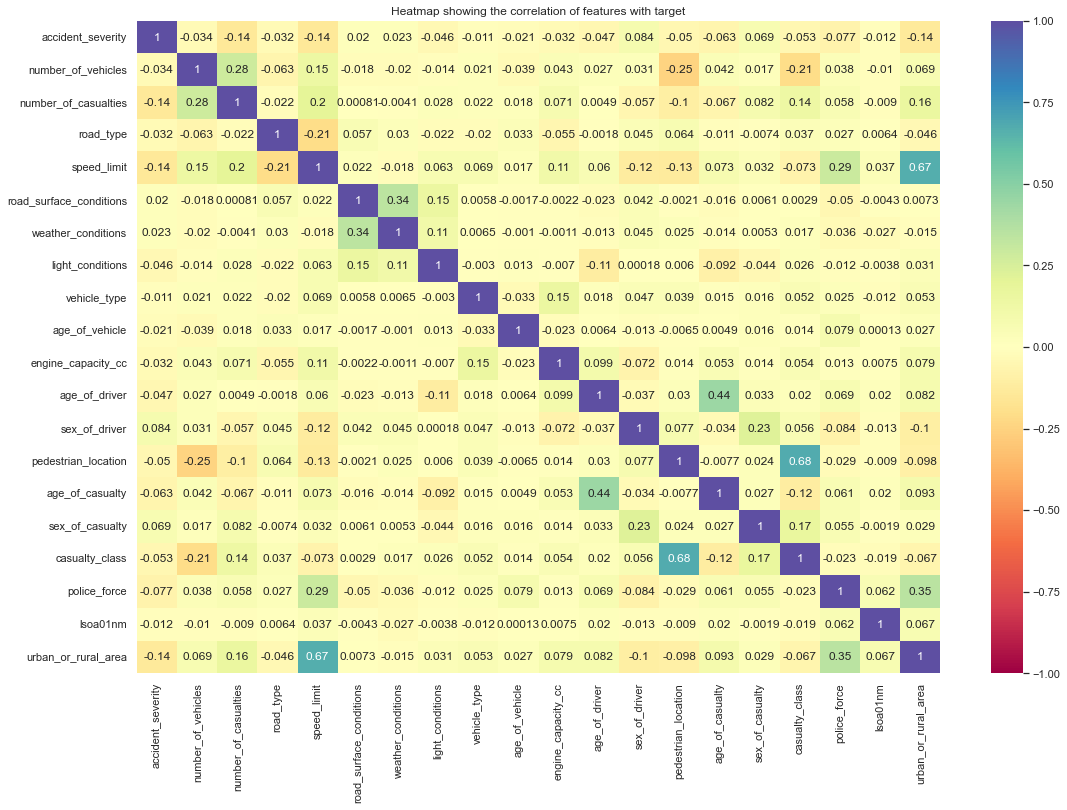

In [189]:
df_cor = df_data.corr()
plt.figure(figsize = (18, 12))
sns.heatmap(df_cor, annot = True, vmin = -1, vmax = 1, cmap = 'Spectral')
plt.title('Heatmap showing the correlation of features with target')

# Using Random Forest

In [190]:
#To check the value count of the target

df.accident_severity.value_counts()

3    158056
2     40215
1      3672
Name: accident_severity, dtype: int64

### Splitting the data

In [191]:
#select the features and target

X = df.drop('accident_severity', axis = 1)
y = df['accident_severity'] == 1

In [192]:
y.value_counts()

False    198271
True       3672
Name: accident_severity, dtype: int64

In [193]:
#To split the data into the training and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=0)

In [194]:
from sklearn.ensemble import RandomForestRegressor

In [195]:
rf = RandomForestClassifier(random_state = 0)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

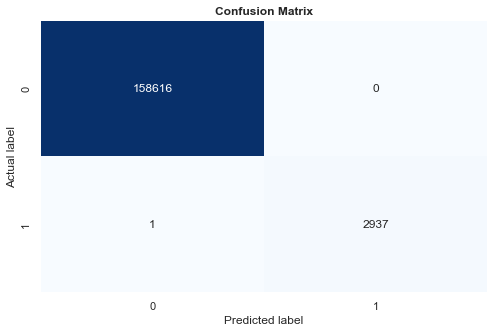

Accuracy    Recall  Precision  F1-score
0  0.999994  0.999994   0.999994  0.999994

In [196]:
rf_train = model_performance_classification(rf, X_train, y_train)

rf_train

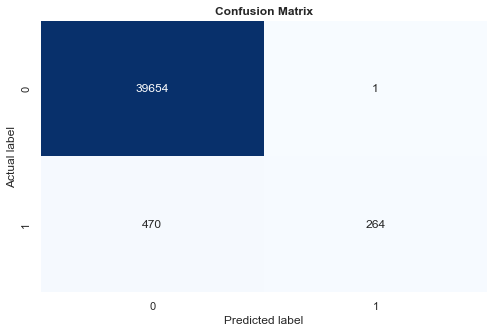

Accuracy    Recall  Precision  F1-score
0  0.988338  0.988338   0.988431  0.985635

In [197]:
rf_test = model_performance_classification(rf, X_test, y_test)

rf_test

# Using Gradient Boosting

In [198]:
gb = GradientBoostingClassifier()

#train the model
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [199]:
gb = GradientBoostingClassifier(random_state = 0)

gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

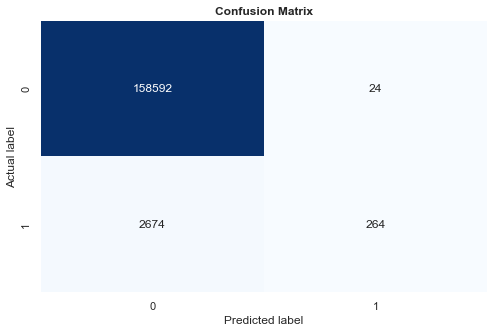

Accuracy  Recall  Precision  F1-score
0    0.9833  0.9833   0.982205   0.97651

In [200]:
gb_train = model_performance_classification(gb, X_train, y_train)

gb_train

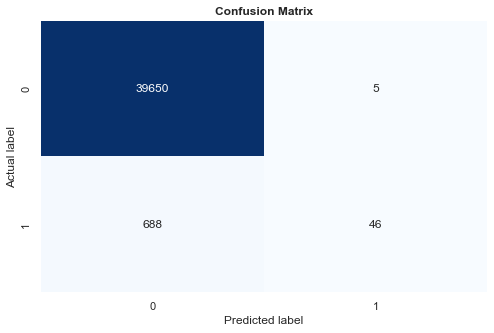

Accuracy    Recall  Precision  F1-score
0  0.982842  0.982842   0.981472  0.975451

In [201]:
gb_test = model_performance_classification(gb, X_test, y_test)

gb_test

## Using UnderSampler for Balancing the Data

In [202]:
from imblearn.under_sampling import RandomUnderSampler

In [203]:
us = RandomUnderSampler(sampling_strategy='auto', random_state=0)

In [204]:
#To perform smote on the features and target
X_us, y_us = us.fit_resample(X,y)

In [205]:
y_us.value_counts()

False    3672
True     3672
Name: accident_severity, dtype: int64

In [206]:
#re-split the data 
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_us, y_us, test_size=0.2, shuffle=True, random_state=0)

# Random Forest

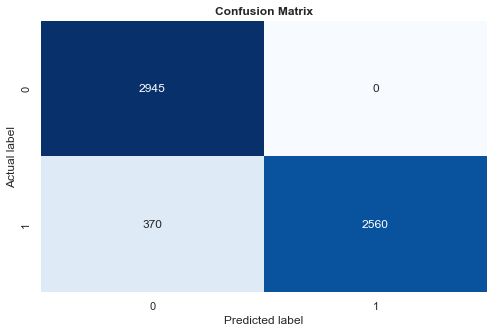

Accuracy    Recall  Precision  F1-score
0  0.937021  0.937021   0.944051   0.93676

In [207]:
rf_train_us = model_performance_classification(rf, X_train_us, y_train_us)

rf_train_us

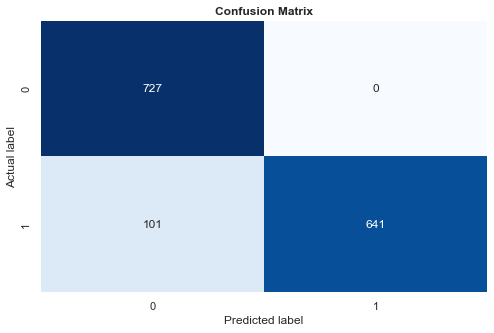

Accuracy    Recall  Precision  F1-score
0  0.931246  0.931246   0.939632  0.930968

In [208]:
rf_test_us = model_performance_classification(rf, X_test_us, y_test_us)

rf_test_us

### To Visualize the feature importance by Random Forest Model

In [209]:
feature_names = X_train.columns.to_list()

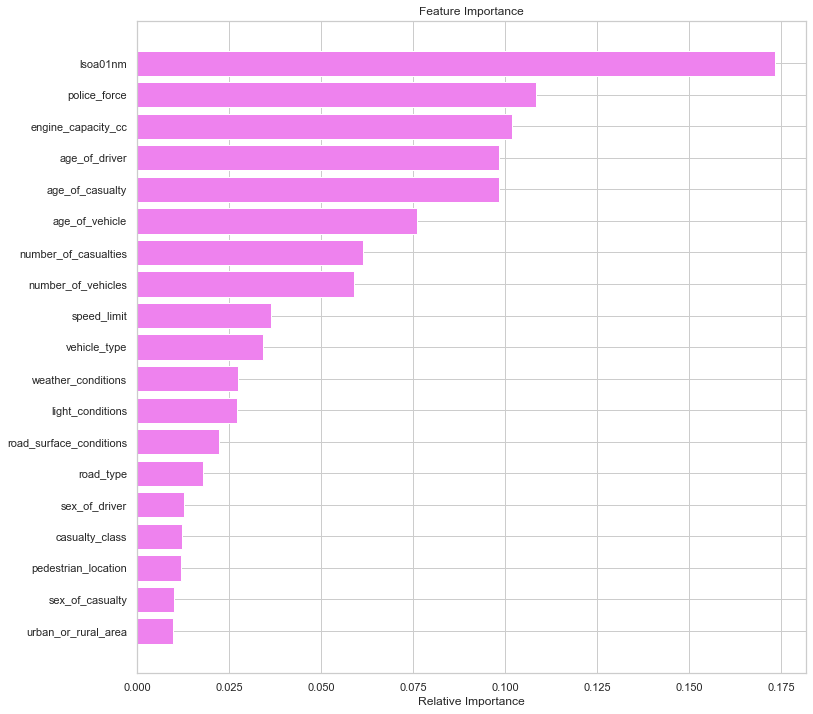

In [210]:

importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')

# Make sure you have defined 'feature_names' properly before using it here
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


# Gradient Boosting

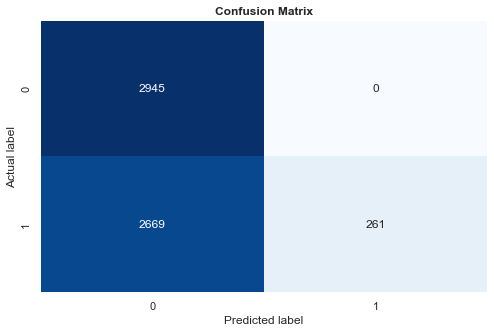

Accuracy    Recall  Precision  F1-score
0  0.545702  0.545702   0.761684  0.426544

In [211]:
gb_train_us = model_performance_classification(gb, X_train_us, y_train_us)

gb_train_us

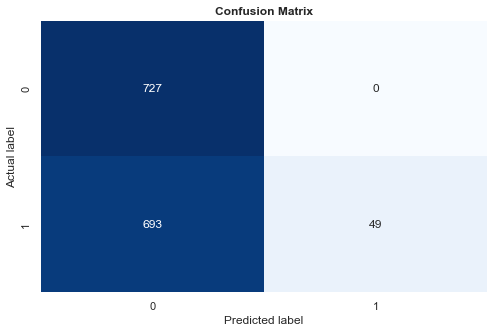

Accuracy    Recall  Precision  F1-score
0  0.528251  0.528251   0.758478  0.397734

In [212]:
gb_test_us = model_performance_classification(gb, X_test_us, y_test_us)

gb_test_us